# logistic map simulation

Our goal is to find the relation between the limit of the following series
$$
x_{n+1} = r x_n (1 - x_n)
$$
and the parameter $r$.

$$
x = r x(1-x)
$$

$$
x^2 + (\frac{1}{r} - 1)x = 0
$$

$$
x = 1 - \frac{1}{r}
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
from multiprocessing import Pool

In [2]:
x_series = []
r = 3.5

x_series.append(0.01)

for i in range(500000):
    x_series.append(r * x_series[-1] * (1 - x_series[-1]))
    
x_series_lim_4 = np.around(x_series[-100:], 4)
np.unique(x_series_lim_4)

array([0.3828, 0.5009, 0.8269, 0.875 ])

In [2]:
def logistic_map_lim(r, N = 500000):
    x_series = []
    x_series.append(0.01)

    for i in range(N):
        x_series.append(r * x_series[-1] * (1 - x_series[-1]))

    x_series_lim_4 = np.around(x_series[-100:], 4)
    return np.unique(x_series_lim_4)

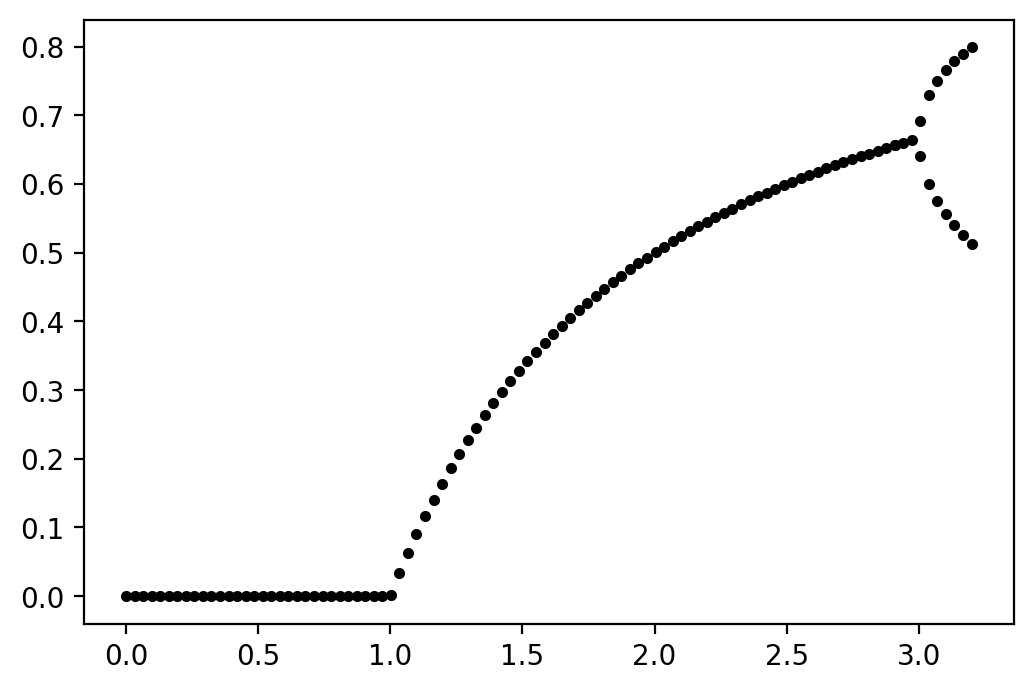

In [4]:
r = np.linspace(0, 3.2, 100)

plt.figure(figsize=(6, 4), dpi=200)
for R in r:
    series_lim = logistic_map_lim(R)
    for lim in series_lim:
        plt.plot(R, lim, '.', c='k')
plt.show()

In [77]:
r = np.linspace(0, 4.0, 200)

series_limits = []

for R in r:
    series_limits.append(logistic_map_lim(R))

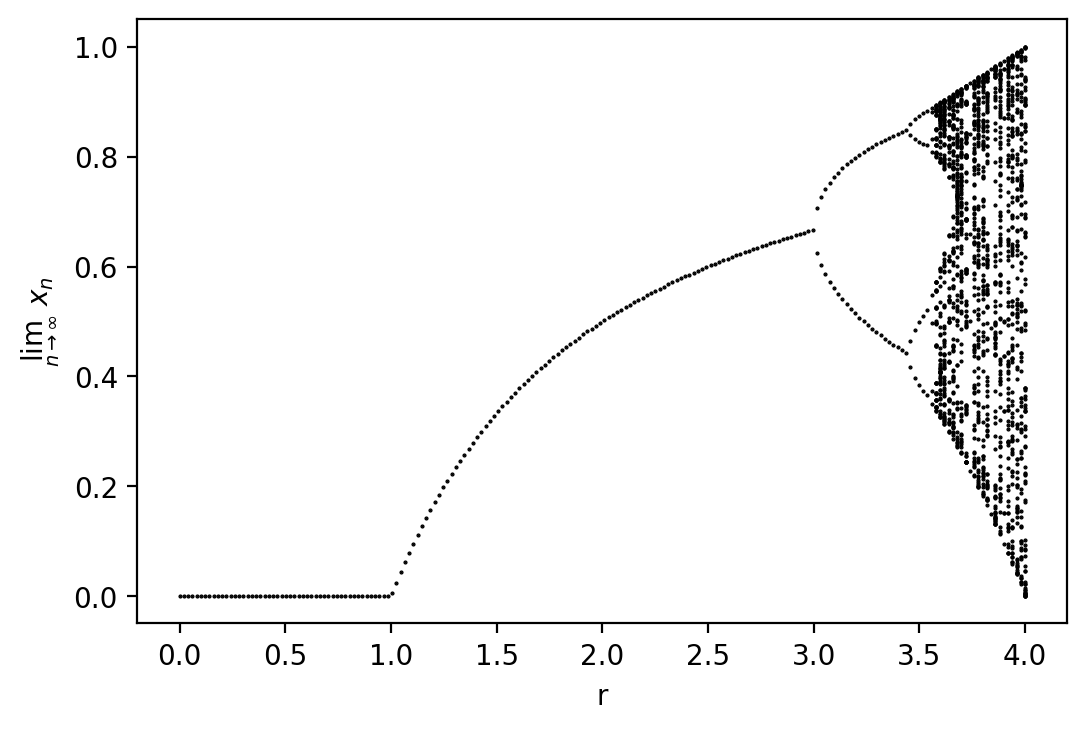

In [85]:
plt.figure(figsize=(6, 4), dpi=200)
for i in range(len(r)):
    for lim in series_limits[i]:
        plt.plot(r[i], lim, '.', c='k', markersize=1)
plt.xlabel('r')
plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
plt.show()

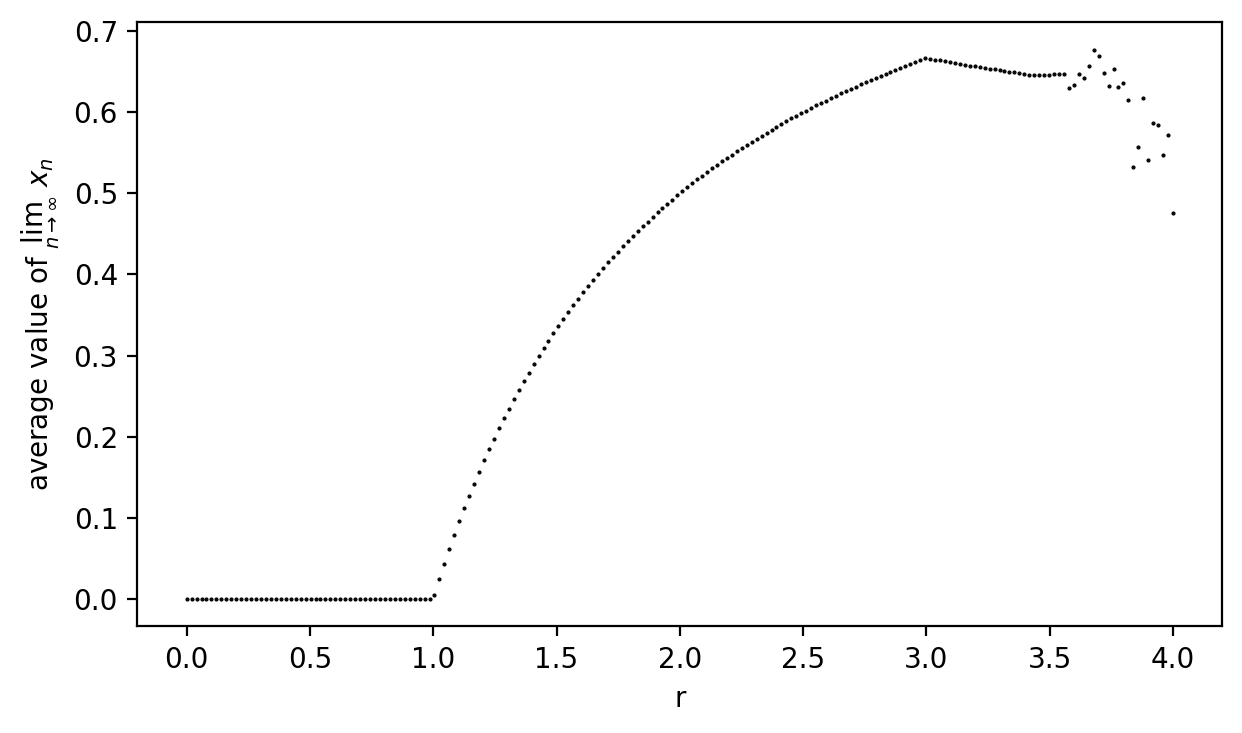

In [98]:
plt.figure(figsize=(7, 4), dpi=200)
for i in range(len(r)):
    plt.plot(r[i], np.average(series_limits[i]), '.', c='k', markersize=1)
    
plt.xlabel('r')
plt.ylabel('average value of $\lim_{n \\rightarrow \infty}~x_n$')
plt.show()

In [69]:
logistic_map_lim(3)

array([0.6663, 0.667 ])

In [48]:
x_series[-1]

0.8269407065914387

In [58]:
x_series_lim_4 = np.around(x_series[-100:], 4)

In [59]:
np.unique(x_series_lim_4)

array([0.3828, 0.5009, 0.8269, 0.875 ])

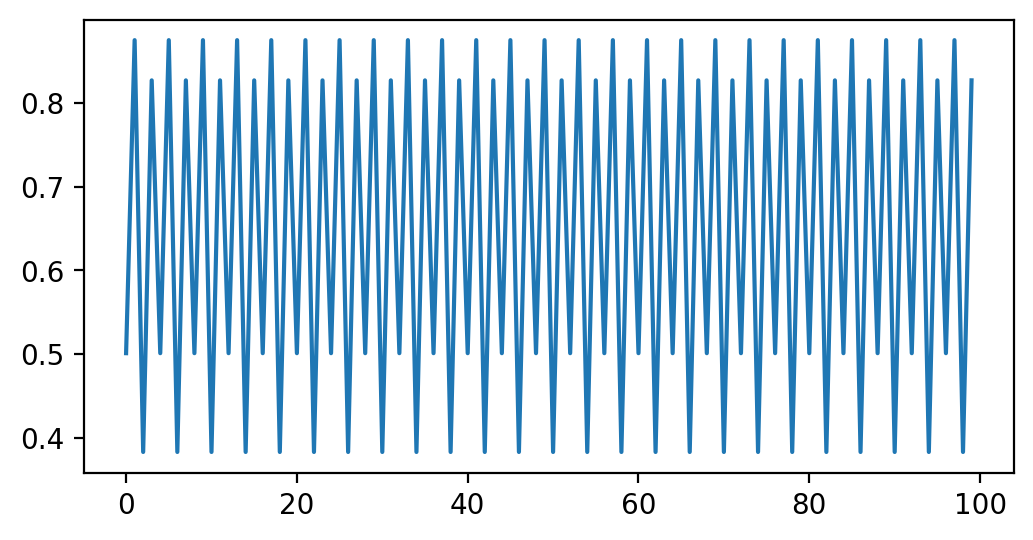

In [49]:
plt.figure(figsize=(6, 3), dpi=200)
plt.plot(range(100), x_series[-100:])
plt.show()

In [3]:
def logistic_map_lim_point(r, N = 500000, N_tail = 5000, decimal = 4):
    x_series = []
    x_series.append(0.01)

    for i in range(N):
        x_series.append(r * x_series[-1] * (1 - x_series[-1]))

    x_series_lim = np.around(x_series[-N_tail:], decimal)
    x_series_lim_unique = np.unique(x_series_lim)
    lim_point = np.zeros([2, len(x_series_lim_unique)])
    lim_point[0] = r * np.ones(len(x_series_lim_unique))
    lim_point[1] = x_series_lim_unique
    return lim_point

In [280]:
r = np.linspace(2.5, 3.5, 100)

lim_points = np.array([[], []])

for R in r:
    lim_points = np.concatenate((lim_points, logistic_map_lim_point(R, decimal = 8)), axis=1)

In [254]:
lim_points.shape

(2, 162)

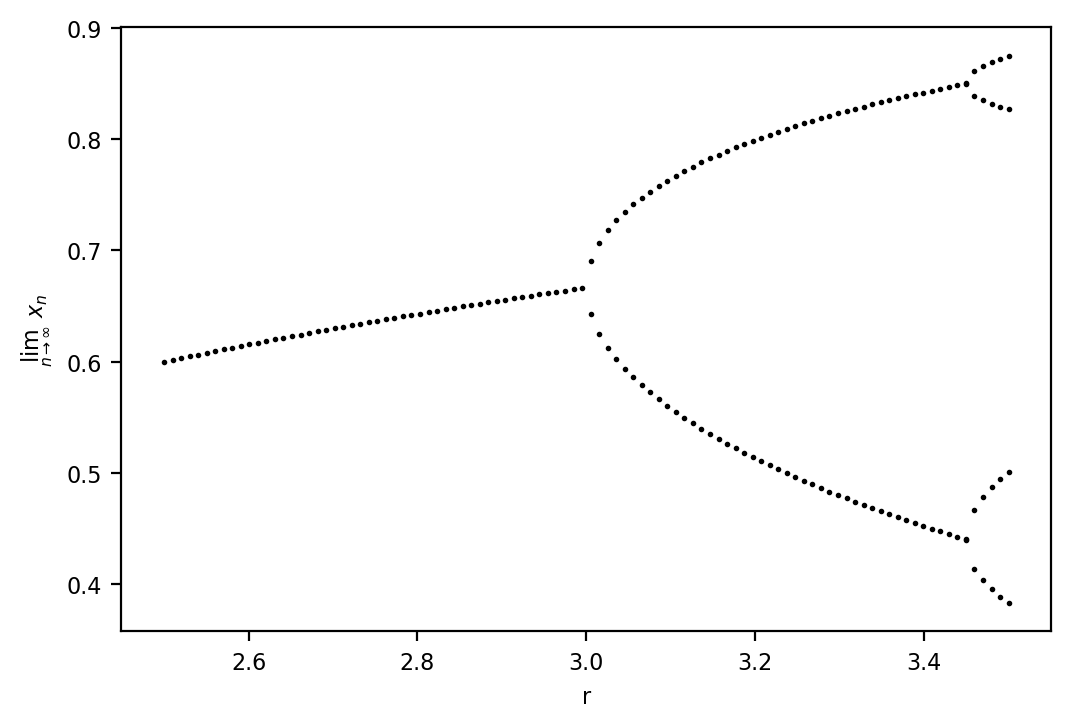

In [281]:
plt.figure(figsize=(6, 4), dpi=200)
plt.scatter(lim_points[0], lim_points[1], c='k', s = 1)
plt.xlabel('r')
plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
plt.show()

In [4]:
from multiprocessing import Pool

In [274]:
logistic_map_lim_point(3.5, N = 1000000, N_tail = 5000, decimal = 8)

array([[3.5       , 3.5       , 3.5       , 3.5       ],
       [0.38281968, 0.50088421, 0.82694071, 0.87499726]])

In [276]:
logistic_map_lim_point(3.5, N = 500000, N_tail = 5000, decimal = 8)

array([[3.5       , 3.5       , 3.5       , 3.5       ],
       [0.38281968, 0.50088421, 0.82694071, 0.87499726]])

In [272]:
logistic_map_lim_point(3.6, N = 500000, N_tail = 5000, decimal = 9)

array([[3.6       , 3.6       , 3.6       , ..., 3.6       , 3.6       ,
        3.6       ],
       [0.32400005, 0.32400021, 0.32400053, ..., 0.89999982, 0.89999993,
        0.89999998]])

In [5]:
def logistic_map_lim_points_child(r, N = 500000):
    lim_points = np.array([[], []])
    for R in r:
        lim_points = np.concatenate((lim_points, logistic_map_lim_point(R, N, N_tail = 5000, decimal = 8)), axis=1)
    return lim_points

In [282]:
r = np.linspace(0, 4, 1201)
rs = np.split(r[1:], 4)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 4)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_points_child, rs)

# close threads
pool.close()

# processing results
lim_points = np.array([[0], [0]])
for result in results:
    lim_points = np.concatenate((lim_points, result), axis=1)

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 83.849s.


In [283]:
lim_points.shape

(2, 601296)

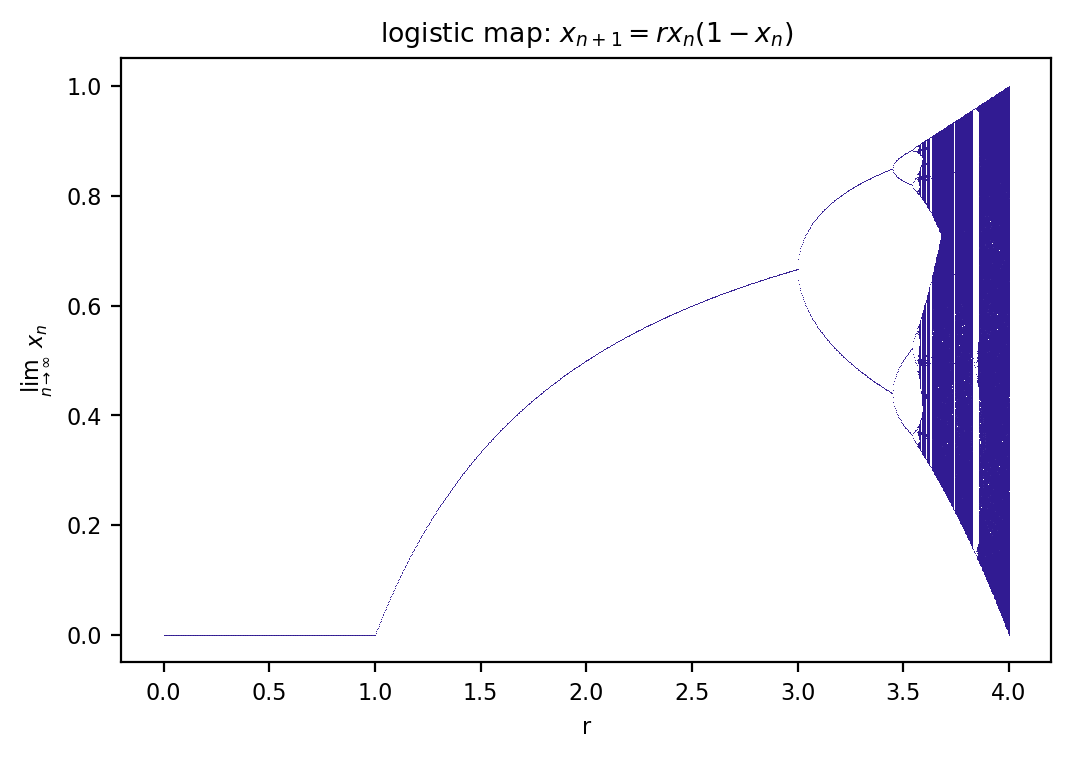

In [285]:
plt.figure(figsize=(6, 4), dpi=200)
plt.rcParams.update({'font.size': 8})
plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 0.5, marker = '.', alpha = 1, linewidths = 0)
plt.xlabel('r')
plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
plt.savefig('./test.png', dpi = 200, format = 'png')
plt.show()

In [243]:
r = np.linspace(3.5, 4, 1200)
rs = np.split(r, 4)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 4)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_points_child, rs)

# close threads
pool.close()

# processing results
lim_points = np.array([[], []])
for result in results:
    lim_points = np.concatenate((lim_points, result), axis=1)

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 87.435s.


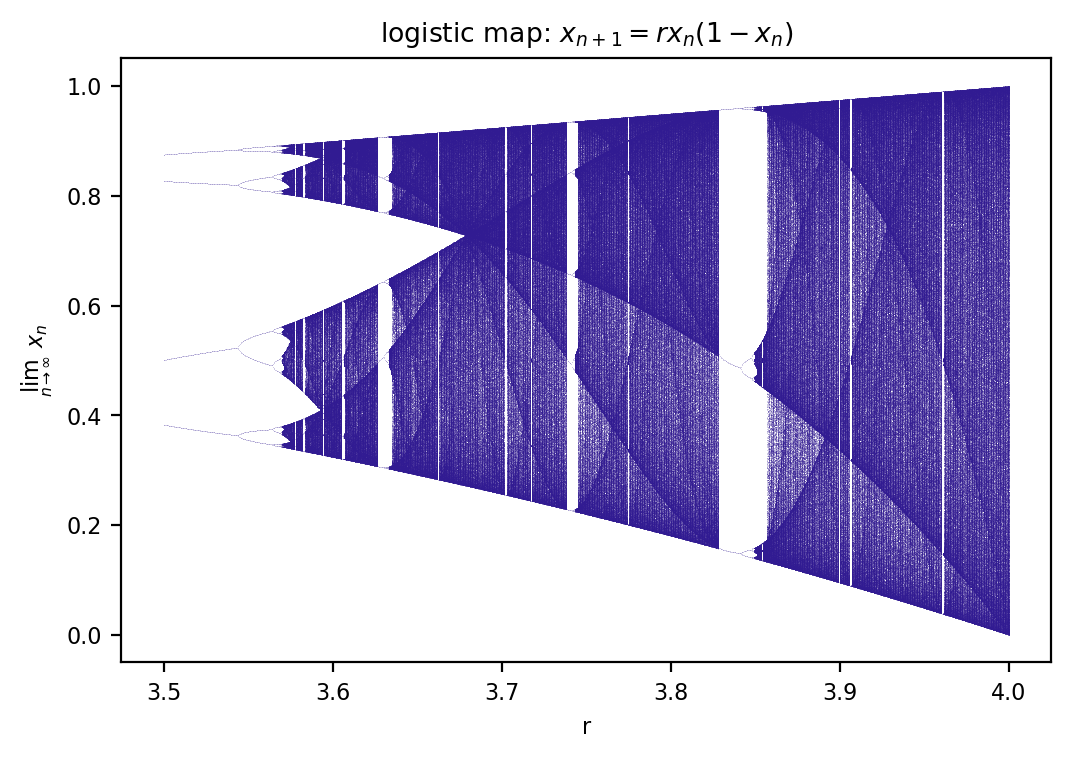

In [247]:
plt.figure(figsize=(6, 4), dpi=200)
plt.rcParams.update({'font.size': 8})
plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 0.08, marker = '.', alpha = 1, linewidths = 0)
plt.xlabel('r')
plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
plt.savefig('./test.png', dpi = 200, format = 'png')
plt.show()

In [300]:
logistic_map_lim_point(0, N_tail = 1000, decimal = 4).shape[1]

1

In [6]:
def logistic_map_lim_points_density_child(r, N = 500000):
    lim_points_density = []
    for R in r:
        lim_points_density.append(logistic_map_lim_point(R, N, N_tail = 5000, decimal = 4).shape[1])
    return np.array(lim_points_density)

In [341]:
r = np.linspace(0, 4, 1801)
rs = np.split(r[1:], 6)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 6)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_points_density_child, rs)

# close threads
pool.close()

# processing results
lim_points_density = np.array([1])
for result in results:
    lim_points_density = np.concatenate((lim_points_density, result), axis=0)

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 111.779s.


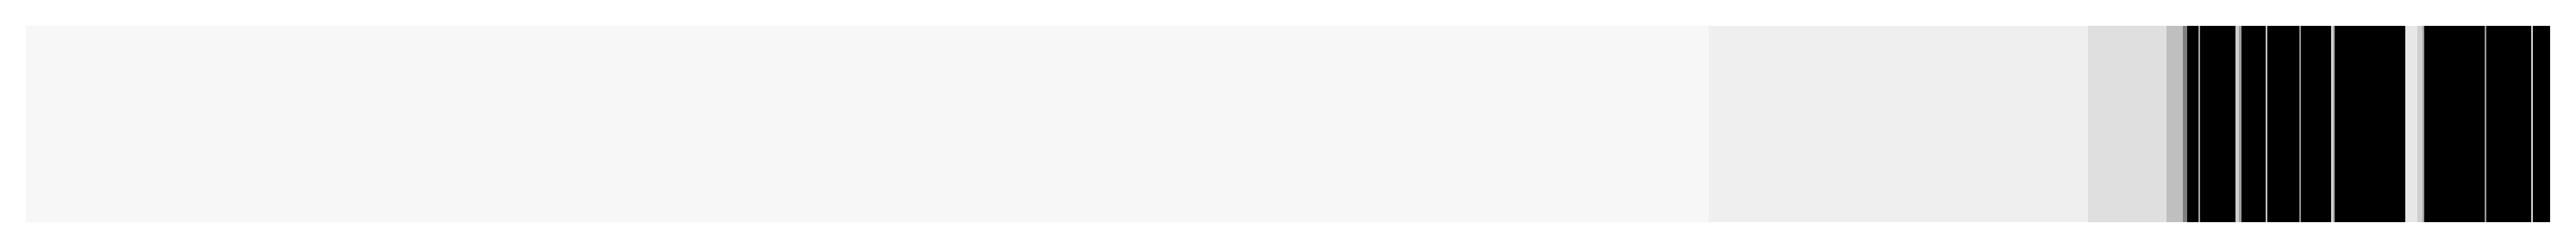

In [425]:
plt.figure(figsize=(10, 1), dpi=300)
plt.rcParams.update({'font.size': 8})
#plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 0.08, marker = '.', alpha = 1, linewidths = 0)
#plt.plot(r, lim_points_density, 's', markersize = 1)
grid_r, grid_y = np.meshgrid(r, np.linspace(0, 1, 11))
grid_density = np.meshgrid(lim_points_density, np.ones(11))[0]
plt.pcolormesh(grid_r, grid_y, grid_density, vmax=32, vmin=0, cmap='binary')
plt.xlim(1, 4)
plt.axis('off')
#plt.ylim(0, 35)
#plt.xlabel('r')
#plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
#plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
plt.tight_layout()
plt.savefig('./logistic_map_density_stripe.png', dpi = 300, format = 'png')
plt.show()

In [441]:
r = np.linspace(3, 4, 1800)
rs = np.split(r, 6)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 6)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_points_density_child, rs)

# close threads
pool.close()

# processing results
lim_points_density = np.array([])
for result in results:
    lim_points_density = np.concatenate((lim_points_density, result), axis=0)

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 93.047s.


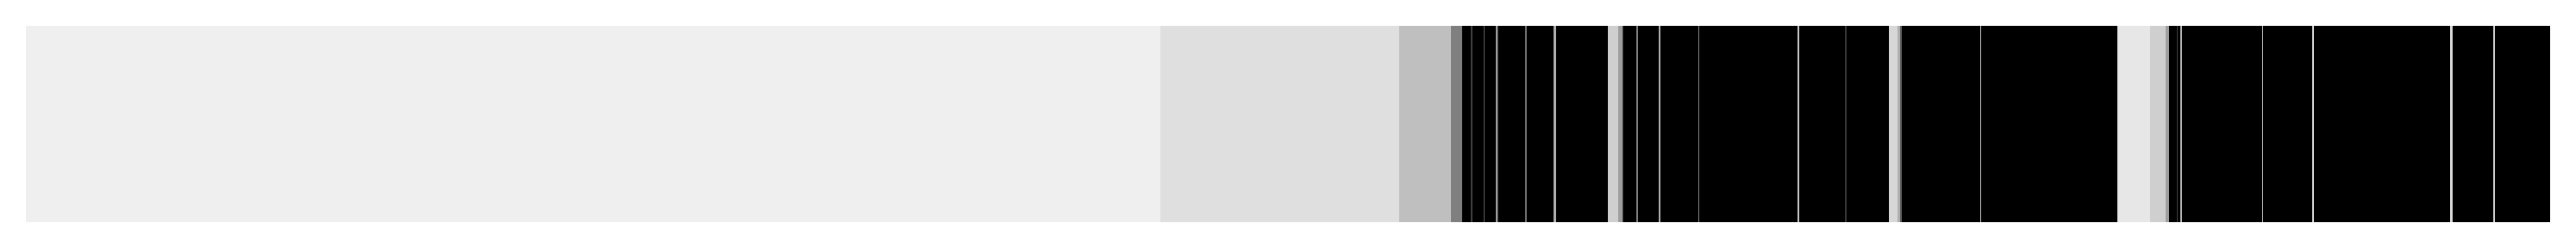

In [451]:
plt.figure(figsize=(10, 1), dpi=300)
plt.rcParams.update({'font.size': 8})
#plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 0.08, marker = '.', alpha = 1, linewidths = 0)
#plt.plot(r, lim_points_density, 's', markersize = 1)
grid_r, grid_y = np.meshgrid(r, np.linspace(0, 1, 11))
grid_density = np.meshgrid(lim_points_density, np.ones(11))[0]
plt.pcolormesh(grid_r, grid_y, grid_density, vmax=32, vmin=0, cmap='binary')
plt.xlim(3, 4)
plt.axis('off')
#plt.ylim(0, 35)
#plt.xlabel('r')
#plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
#plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
plt.tight_layout()
#plt.savefig('./logistic_map_density_stripe.png', dpi = 300, format = 'png')
plt.show()

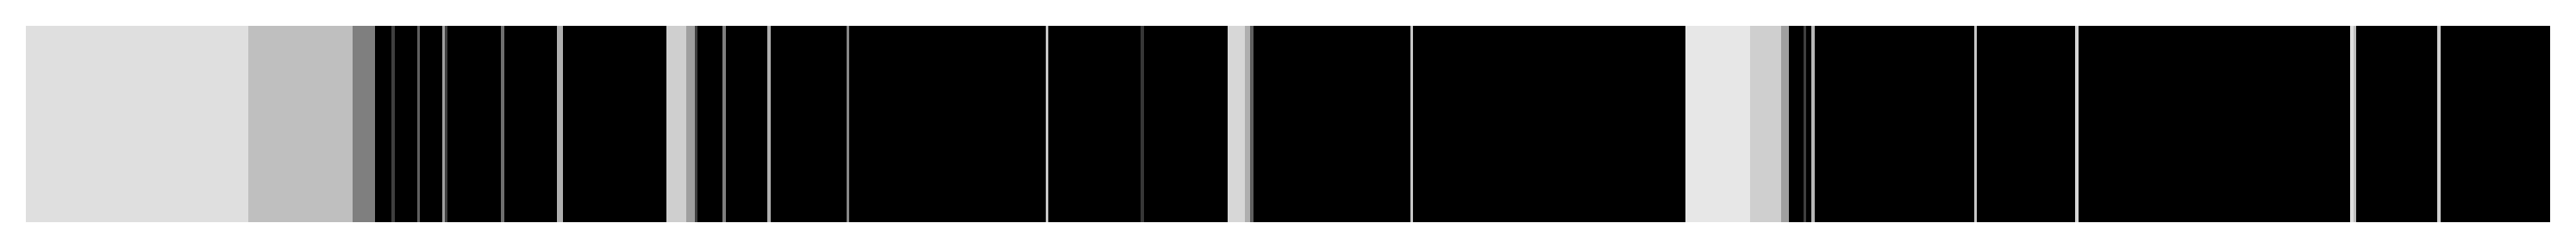

In [455]:
plt.figure(figsize=(10, 1), dpi=300)
plt.rcParams.update({'font.size': 8})
#plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 0.08, marker = '.', alpha = 1, linewidths = 0)
#plt.plot(r, lim_points_density, 's', markersize = 1)
grid_r, grid_y = np.meshgrid(r, np.linspace(0, 1, 11))
grid_density = np.meshgrid(lim_points_density, np.ones(11))[0]
plt.pcolormesh(grid_r, grid_y, grid_density, vmax=32, vmin=0, cmap='binary')
plt.xlim(3.5, 4)
plt.axis('off')
#plt.ylim(0, 35)
#plt.xlabel('r')
#plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
#plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
plt.tight_layout()
#plt.savefig('./logistic_map_density_stripe.png', dpi = 300, format = 'png')
plt.show()

In [482]:
r = np.linspace(1, 4, 6001)
rs = np.split(r[1:], 6)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 6)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_points_density_child, rs)

# close threads
pool.close()

# processing results
lim_points_density = np.array([1])
for result in results:
    lim_points_density = np.concatenate((lim_points_density, result), axis=0)

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 340.859s.


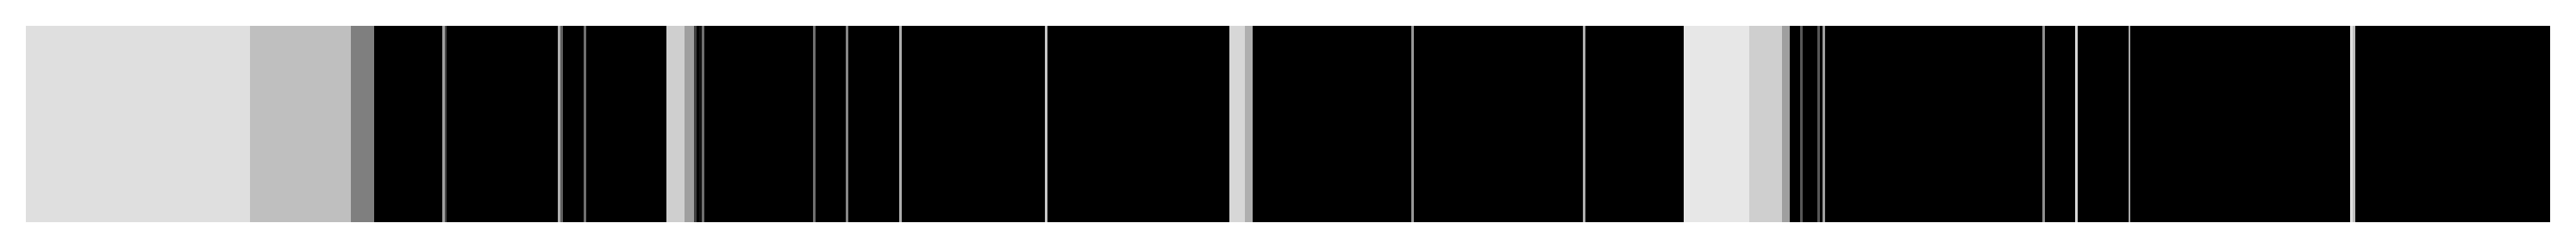

In [492]:
plt.figure(figsize=(10, 1), dpi=300)
plt.rcParams.update({'font.size': 8})
#plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 0.08, marker = '.', alpha = 1, linewidths = 0)
#plt.plot(r, lim_points_density, 's', markersize = 1)
grid_r, grid_y = np.meshgrid(r, np.linspace(0, 1, 11))
grid_density = np.meshgrid(lim_points_density, np.ones(11))[0]
plt.pcolormesh(grid_r, grid_y, grid_density, vmax=32, vmin=0, cmap='binary')
#plt.pcolormesh(grid_r, grid_y, grid_density, vmax=32, vmin=0, cmap='binary')
plt.xlim(3.5, 4)
plt.axis('off')
#plt.ylim(0, 35)
#plt.xlabel('r')
#plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
#plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
plt.tight_layout()
#plt.savefig('./logistic_map_density_stripe.png', dpi = 300, format = 'png')
plt.show()

In [7]:
def logistic_map_limits(r, N = 500000, N_tail = 5000, decimal = 4):
    x_series = []
    x_series.append(0.01)

    for i in range(N):
        x_series.append(r * x_series[-1] * (1 - x_series[-1]))

    x_series_lim = np.around(x_series[-N_tail:], decimal)
    x_series_lim_unique = np.unique(x_series_lim)
    return x_series_lim_unique

In [8]:
logistic_map_limits(3.5)

array([0.3828, 0.5009, 0.8269, 0.875 ])

In [9]:
def logistic_map_limits_child(r, N = 500000):
    limits = []
    for R in r:
        limits.append(logistic_map_limits(R, N, N_tail = 5000, decimal = 4))
    return limits

In [521]:
limits = logistic_map_limits_child(np.linspace(2, 3.5, 10))

In [534]:
np.append(limits[7], 100)

array([  0.5263,   0.7895, 100.    ])

In [10]:
def r_lim_combiner(r, limits):
    rrs = np.array([])
    lim_points = np.array([])
    counts = np.array([])
    for i in range(len(r)):
        count = len(limits[i])
        rrs = np.append(rrs, r[i] * np.ones(count))
        lim_points = np.append(lim_points, limits[i])
        counts = np.append(counts, count)
    return rrs, lim_points, counts

In [542]:
r = np.linspace(2, 3.5, 10)

In [543]:
r_lim_combiner(r, limits)

(array([2.        , 2.16666667, 2.33333333, 2.5       , 2.66666667,
        2.83333333, 3.        , 3.        , 3.16666667, 3.16666667,
        3.33333333, 3.33333333, 3.5       , 3.5       , 3.5       ,
        3.5       ]),
 array([0.5   , 0.5385, 0.5714, 0.6   , 0.625 , 0.6471, 0.6663, 0.667 ,
        0.5263, 0.7895, 0.4697, 0.8303, 0.3828, 0.5009, 0.8269, 0.875 ]),
 array([1., 1., 1., 1., 1., 1., 2., 2., 2., 4.]))

In [619]:
r = np.linspace(1, 4, 6001)
rs = np.split(r[1:], 6)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 6)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_limits_child, rs)

# close threads
pool.close()

# processing results
limits = [np.array([0])]
for result in results:
    limits = limits + result

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 453.510s.


In [620]:
# convert results
rrs, lim_points, counts = r_lim_combiner(r, limits)

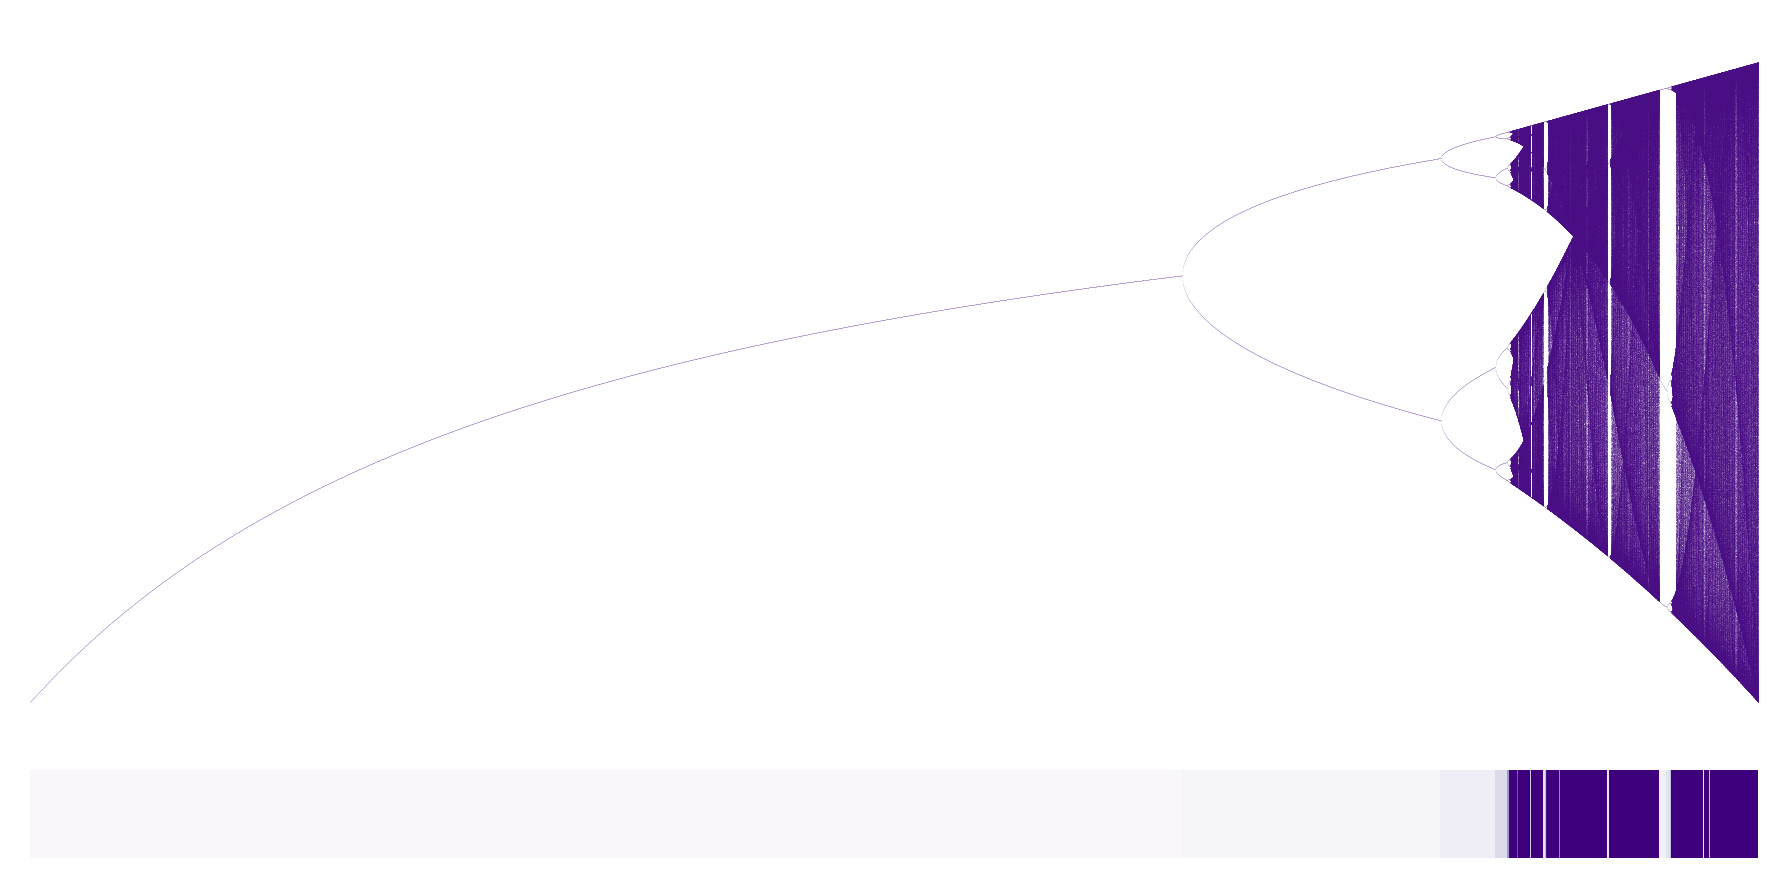

In [625]:
from matplotlib import gridspec

plt.figure(figsize=(6, 3), dpi=300)
gs = gridspec.GridSpec(2, 1, height_ratios=[8, 1])

plt.subplot(gs[0])
plt.scatter(rrs, lim_points, c=[[0.247, 0.0, 0.490, 1]], s = 0.02, marker = '.', alpha = 1, linewidths = 0)
plt.axis('off')
plt.xlim(1,4)

plt.subplot(gs[1])
grid_r, grid_y = np.meshgrid(r, np.linspace(0, 1, 11))
grid_density = np.meshgrid(counts, np.ones(11))[0]
plt.pcolormesh(grid_r, grid_y, grid_density, vmax=32, vmin=0, cmap='Purples')
plt.axis('off')
plt.xlim(1,4)

plt.tight_layout()
plt.savefig('./logistic_map_with_density.png', dpi = 300, format = 'png')

plt.show()

In [626]:
plt.show()

In [594]:
cmap = plt.get_cmap("Purples")

In [603]:
import matplotlib as mpl
from matplotlib import cm

In [604]:
class MplColorHelper:
    
  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
    self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)

In [609]:
COL = MplColorHelper('Purples', 0, 1)

In [611]:
COL.get_rgb(11)

(0.24705882352941178, 0.0, 0.49019607843137253, 1.0)

# For presentation

In [24]:
x_series = []
r = 3.1

x_series.append(0.6774)

for i in range(1000):
    x_series.append(r * x_series[-1] * (1 - x_series[-1]))
    
x_series_lim_4 = np.around(x_series, 4)
#np.unique(x_series_lim_4)

In [23]:
print(np.around(x_series, 4))

[0.6774 0.6774 0.6774 0.6774 0.6774 0.6775 0.6774 0.6775 0.6774 0.6775
 0.6774 0.6775 0.6774 0.6775 0.6773 0.6775 0.6773 0.6775 0.6773 0.6775
 0.6773 0.6776 0.6773 0.6776 0.6772 0.6776 0.6772 0.6777 0.6771 0.6777
 0.6771 0.6778 0.677  0.6779 0.6769 0.678  0.6768 0.6781 0.6767 0.6782
 0.6765 0.6784 0.6764 0.6786 0.6761 0.6788 0.6759 0.6791 0.6755 0.6795
 0.6751 0.6799 0.6747 0.6804 0.6741 0.6811 0.6734 0.6818 0.6725 0.6827
 0.6715 0.6838 0.6702 0.6852 0.6687 0.6868 0.6669 0.6887 0.6646 0.691
 0.662  0.6937 0.6587 0.6969 0.6548 0.7007 0.6501 0.7052 0.6445 0.7103
 0.638  0.716  0.6304 0.7223 0.6218 0.729  0.6124 0.7358 0.6026 0.7424
 0.5929 0.7483 0.5839 0.7532 0.5763 0.7569 0.5703 0.7597 0.566  0.7615
 0.563 ]


In [25]:
for string in ["{:0.4f}".format(x) for x in x_series[-10:]]:
    print(string, end=" ")

0.7646 0.5580 0.7646 0.5580 0.7646 0.5580 0.7646 0.5580 0.7646 0.5580 

In [26]:
np.arange(0,100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

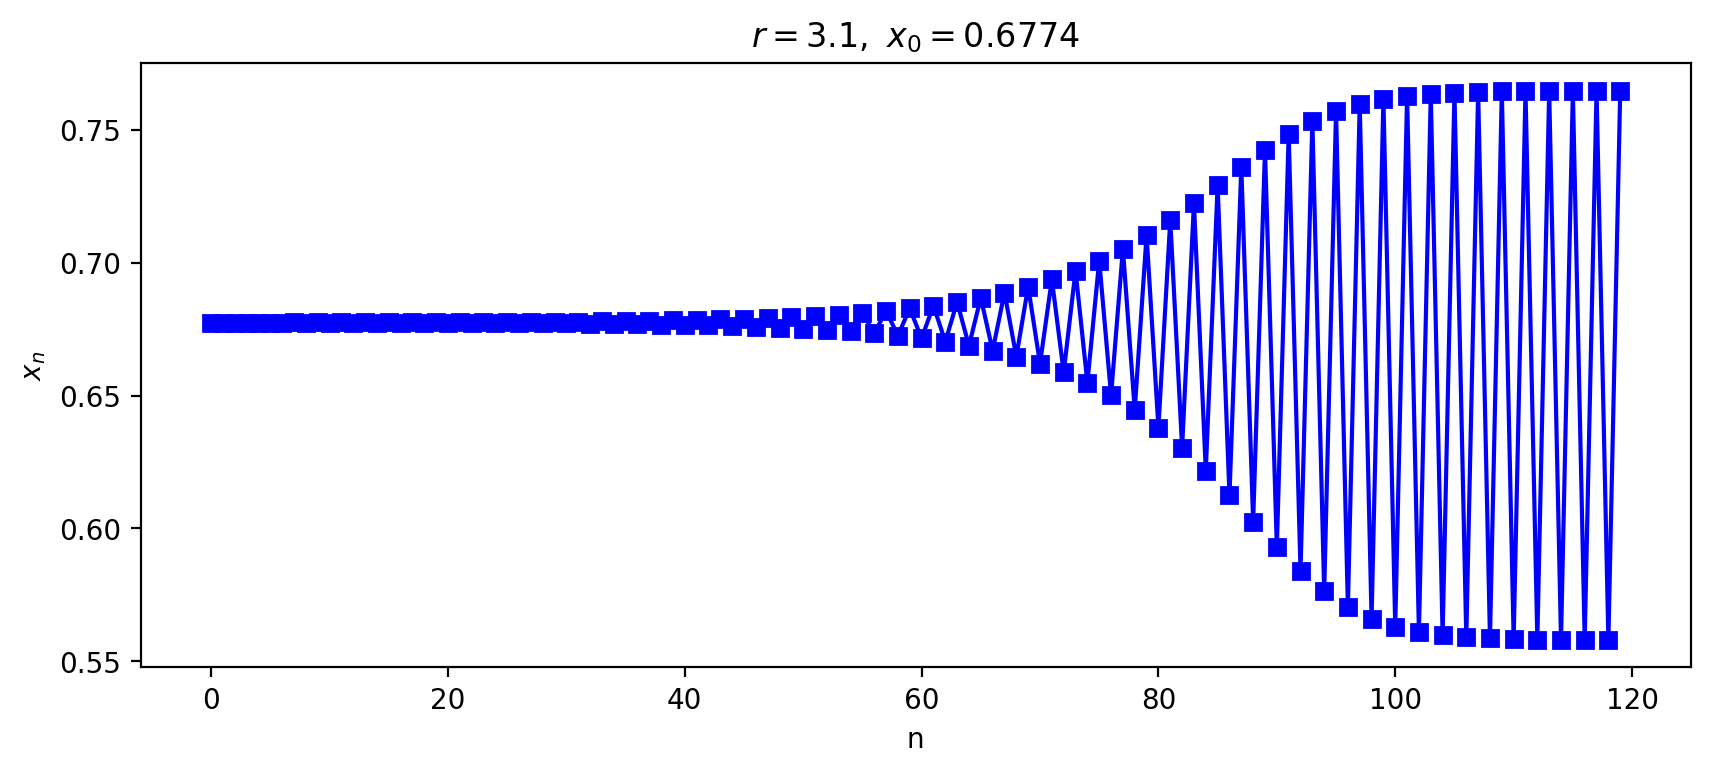

In [46]:
plt.figure(figsize=(10, 4), dpi=200)
plt.rcParams.update({'font.size': 10})
plt.plot(np.arange(0,120), x_series[0:120], 's-', c='b')
#plt.xlim(-0.2,4.2)
#plt.ylim(-0.05,1.05)
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.title('$r=3.1,~x_0 = 0.6774$')
plt.show()

In [80]:
x_series = []
r = 3.5

x_series.append(0.1)

for i in range(1000):
    x_series.append(r * x_series[-1] * (1 - x_series[-1]))
    
x_series_lim_4 = np.around(x_series, 4)
#np.unique(x_series_lim_4)

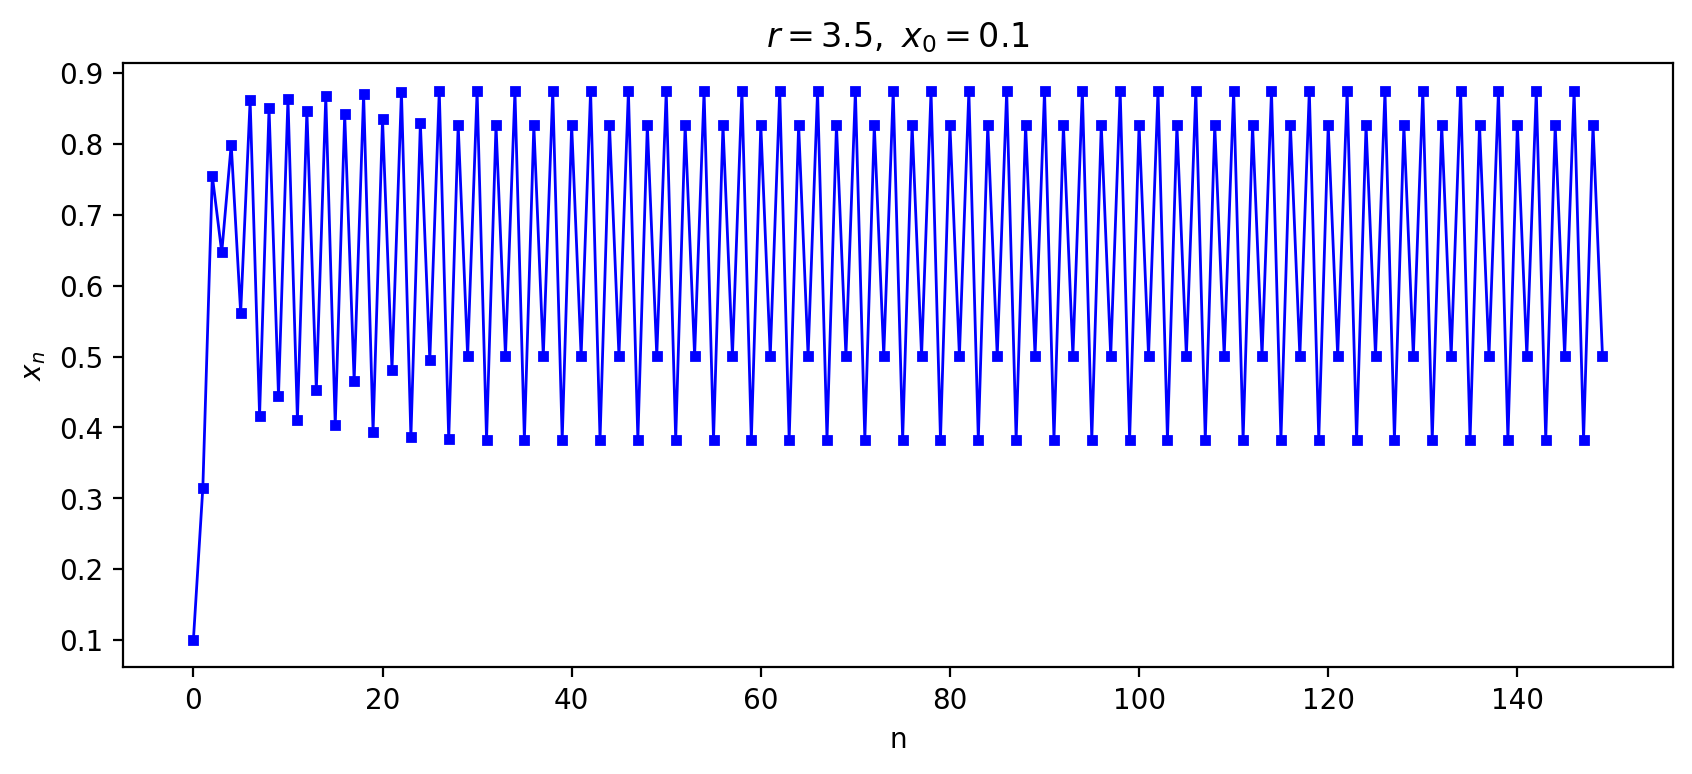

In [82]:
plt.figure(figsize=(10, 4), dpi=200)
plt.rcParams.update({'font.size': 10})
plt.plot(np.arange(0,150), x_series[0:150], 's-', c='b', markersize=3, linewidth=1)
#plt.xlim(-0.2,4.2)
#plt.ylim(-0.05,1.05)
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.title('$r=3.5,~x_0 = 0.1$')
plt.show()

In [66]:
x_series = []
r = 3.8

x_series.append(0.1)

for i in range(10000):
    x_series.append(r * x_series[-1] * (1 - x_series[-1]))
    
x_series_lim_4 = np.around(x_series, 4)
#np.unique(x_series_lim_4)

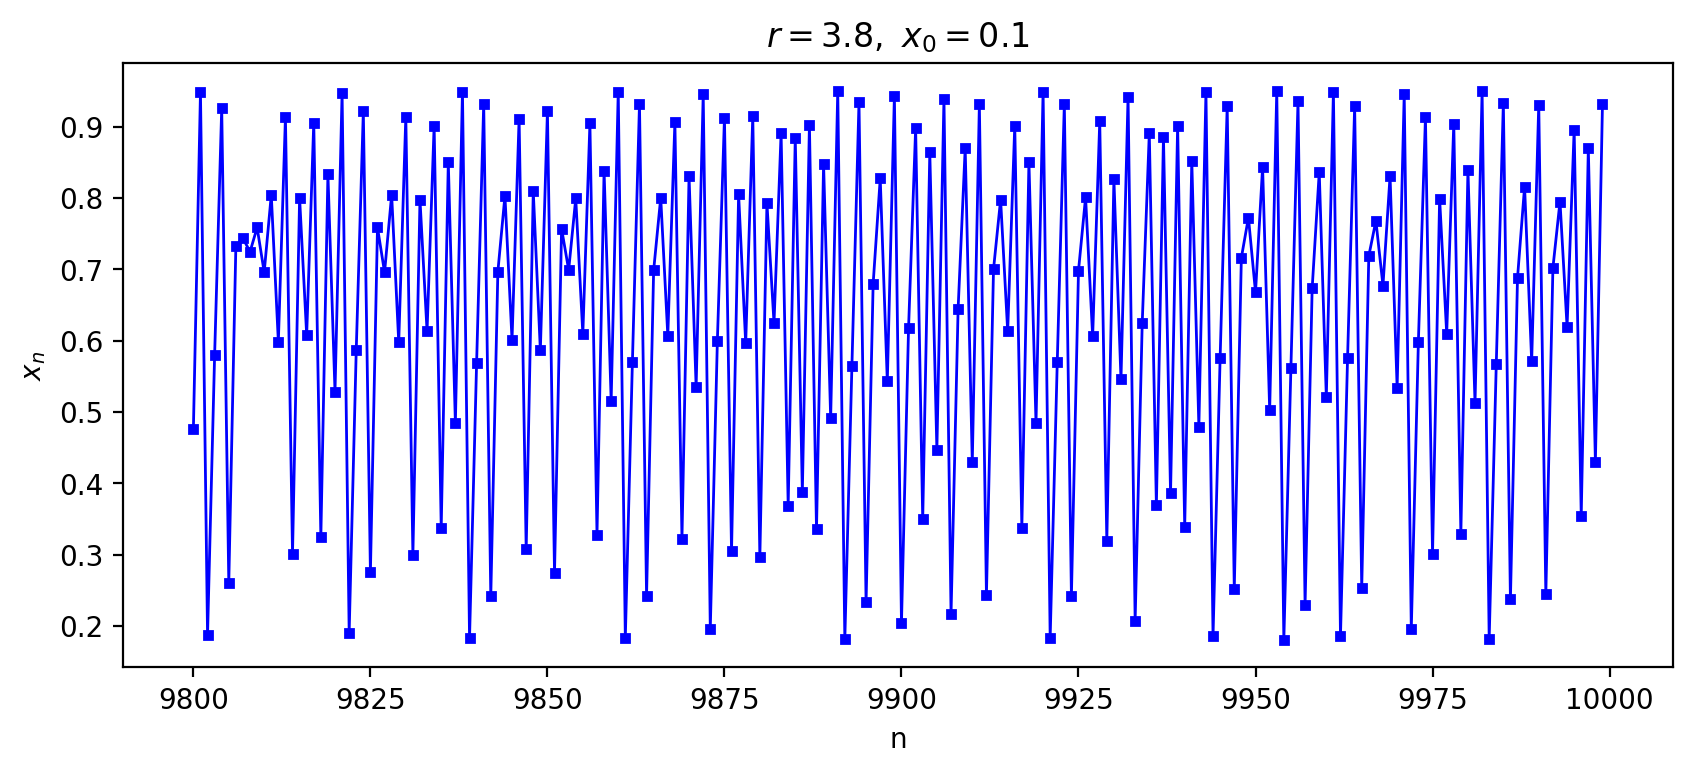

In [68]:
plt.figure(figsize=(10, 4), dpi=200)
plt.rcParams.update({'font.size': 10})
plt.plot(np.arange(9800,10000), x_series[-200:], 's-', c='b', markersize=3, linewidth=1)
#plt.xlim(-0.2,4.2)
#plt.ylim(-0.05,1.05)
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.title('$r=3.8,~x_0 = 0.1$')
plt.show()

In [83]:
x_series = []
r = 4.5

x_series.append(0.1)

for i in range(10000):
    x_series.append(r * x_series[-1] * (1 - x_series[-1]))
    
x_series_lim_4 = np.around(x_series, 4)
#np.unique(x_series_lim_4)

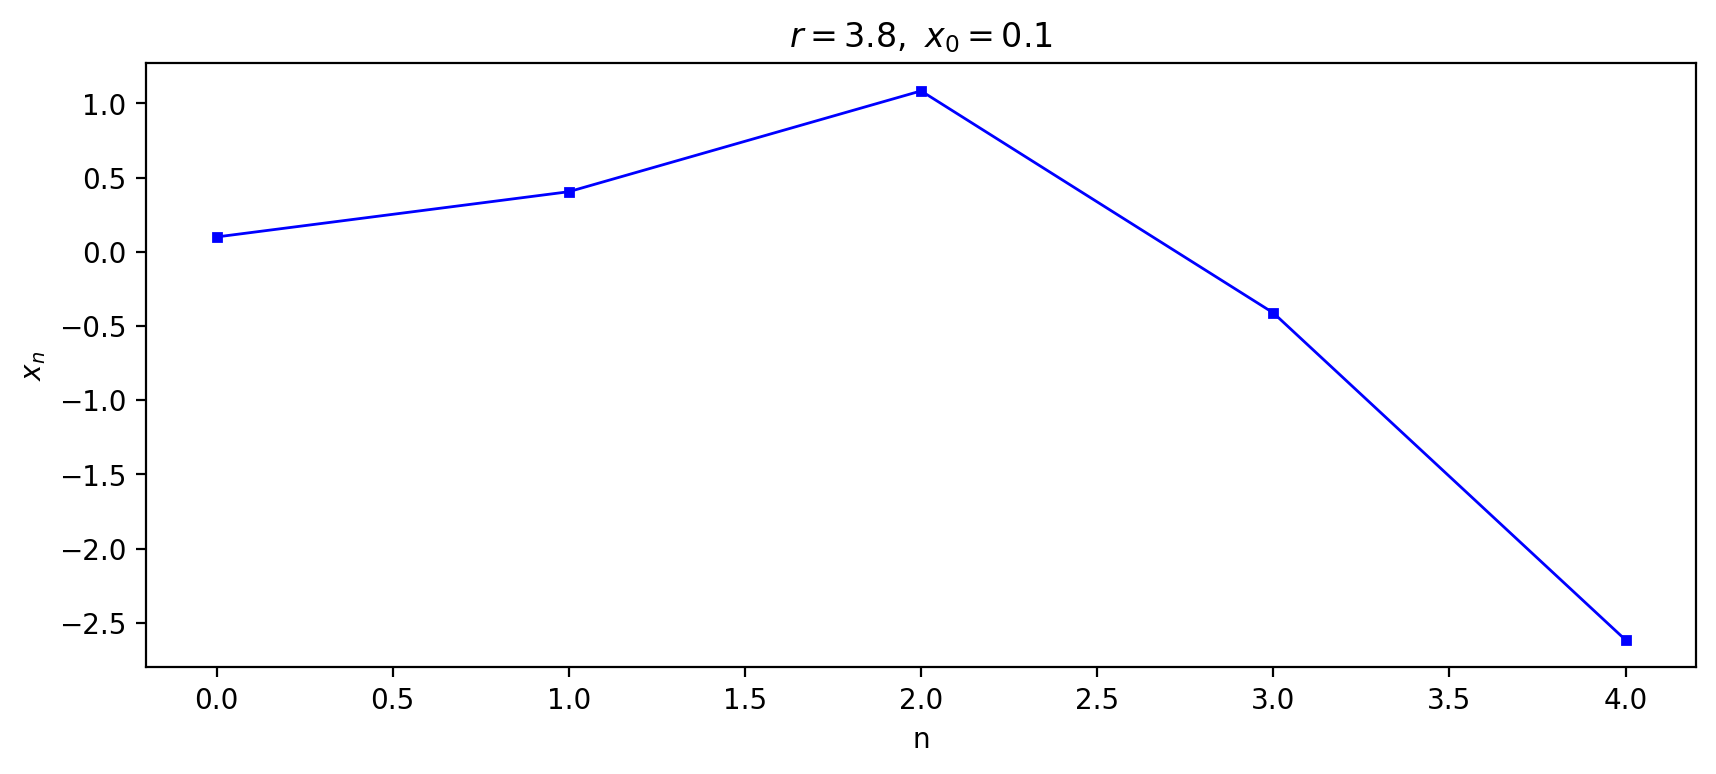

In [87]:
plt.figure(figsize=(10, 4), dpi=200)
plt.rcParams.update({'font.size': 10})
plt.plot(np.arange(0,5), x_series[0:5], 's-', c='b', markersize=3, linewidth=1)
#plt.xlim(-0.2,4.2)
#plt.ylim(-0.05,1.05)
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.title('$r=3.8,~x_0 = 0.1$')
plt.show()

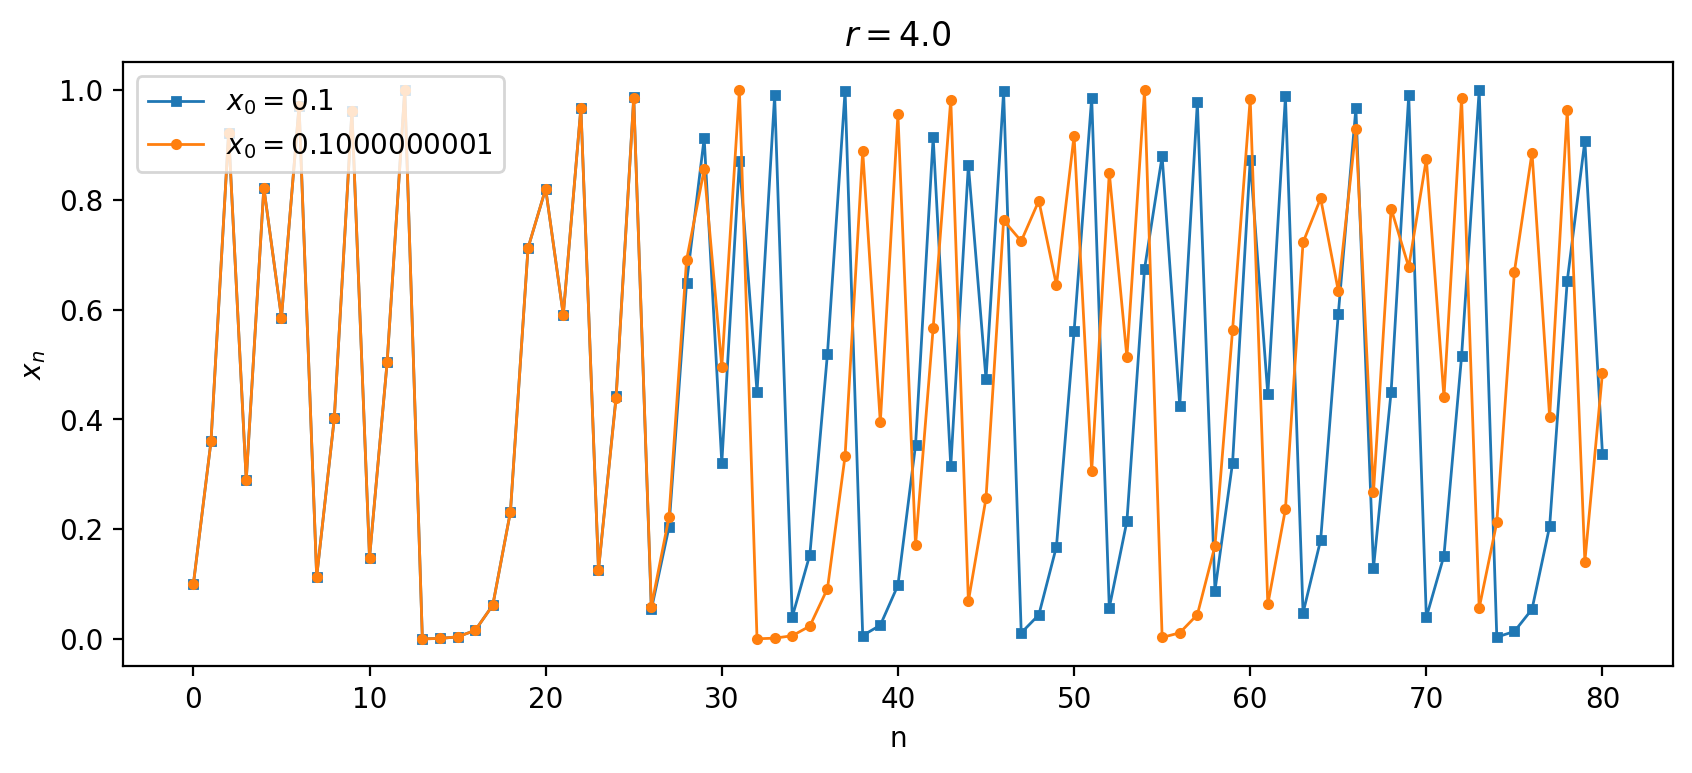

In [136]:
X_series = []

X_0 = [0.1, 0.1000000001]
for x_0 in X_0:
    x_series = []
    r = 4
    x_series.append(x_0)
    for i in range(80):
        x_series.append(r * x_series[-1] * (1 - x_series[-1]))
    X_series.append(x_series)


plt.figure(figsize=(10, 4), dpi=200)
plt.rcParams.update({'font.size': 10})
plt.plot(np.arange(0,81), X_series[0], 's-', c='C0', markersize=3, linewidth=1)
plt.plot(np.arange(0,81), X_series[1], 'o-', c='C1', markersize=3, linewidth=1)
#plt.xlim(-0.2,4.2)
plt.ylim(-0.05,1.05)
plt.legend(['$x_0 = 0.1$', '$x_0 = 0.1000000001$'], loc='upper left')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.title('$r=4.0$')
plt.show()

## Expected curve

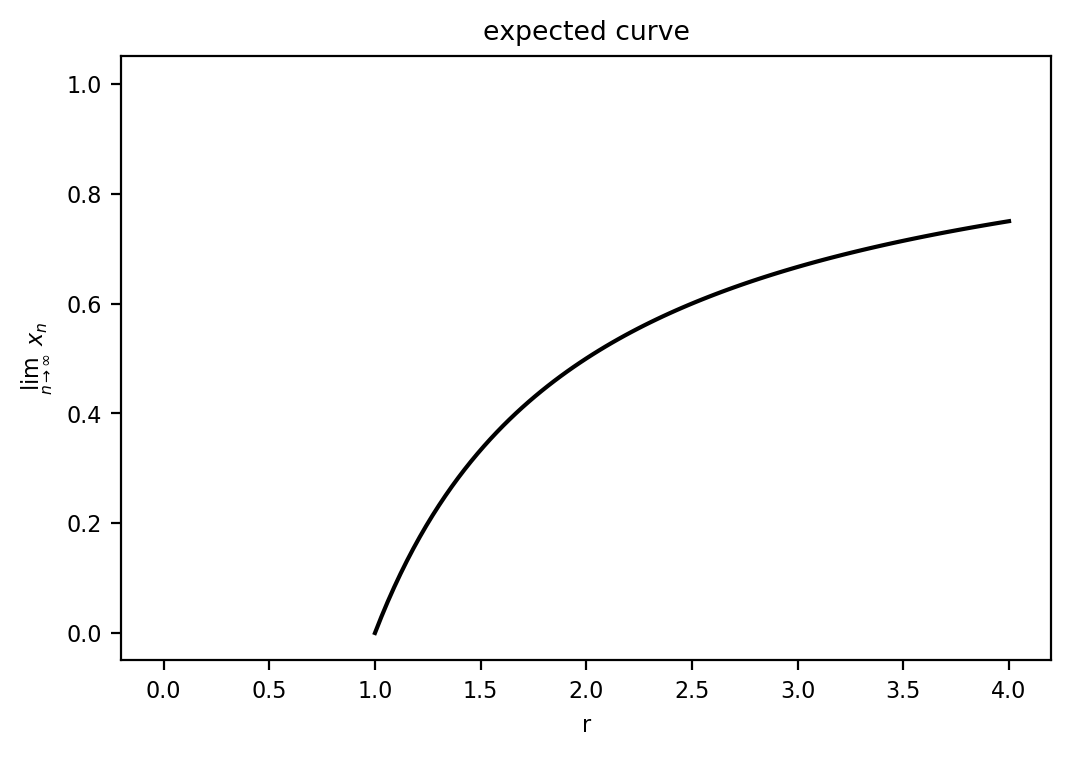

In [16]:
r = np.linspace(1, 4, 100)
y = 1 - 1 / r

plt.figure(figsize=(6, 4), dpi=200)
plt.rcParams.update({'font.size': 8})
plt.plot(r, y, '-', c='k')
plt.xlim(-0.2,4.2)
plt.ylim(-0.05,1.05)
plt.xlabel('r')
plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
plt.title('expected curve')
plt.show()

## Logistic map

In [74]:
r = np.linspace(0, 4, 1201)
rs = np.split(r[1:], 4)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 4)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_points_child, rs)

# close threads
pool.close()

# processing results
lim_points = np.array([[0], [0]])
for result in results:
    lim_points = np.concatenate((lim_points, result), axis=1)

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 81.566s.


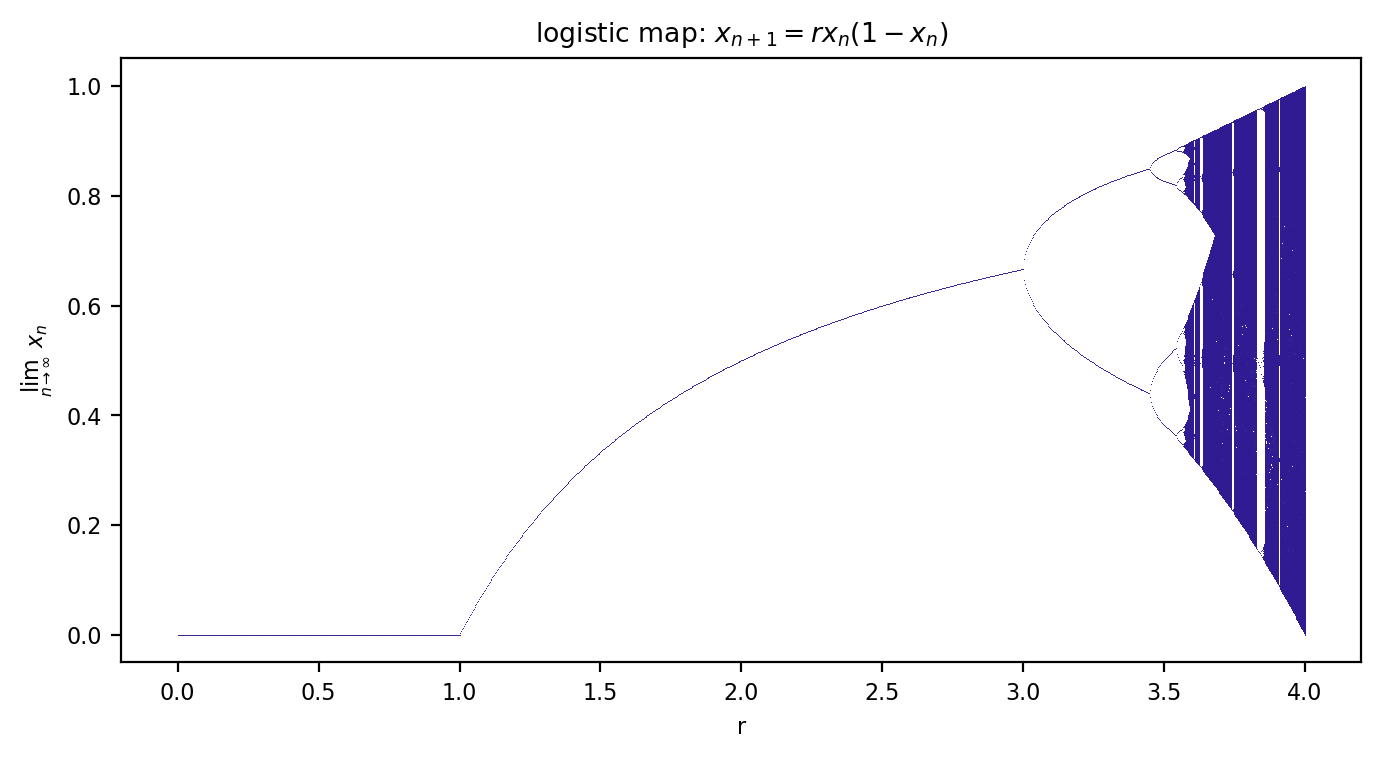

In [76]:
plt.figure(figsize=(8, 4), dpi=200)
plt.rcParams.update({'font.size': 8})
plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 0.5, marker = '.', alpha = 1, linewidths = 0)
plt.xlabel('r')
plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
#plt.savefig('./test.png', dpi = 200, format = 'png')
plt.show()

In [88]:
r = np.linspace(0, 4.0, 200)

series_limits = []

for R in r:
    series_limits.append(logistic_map_lim(R))

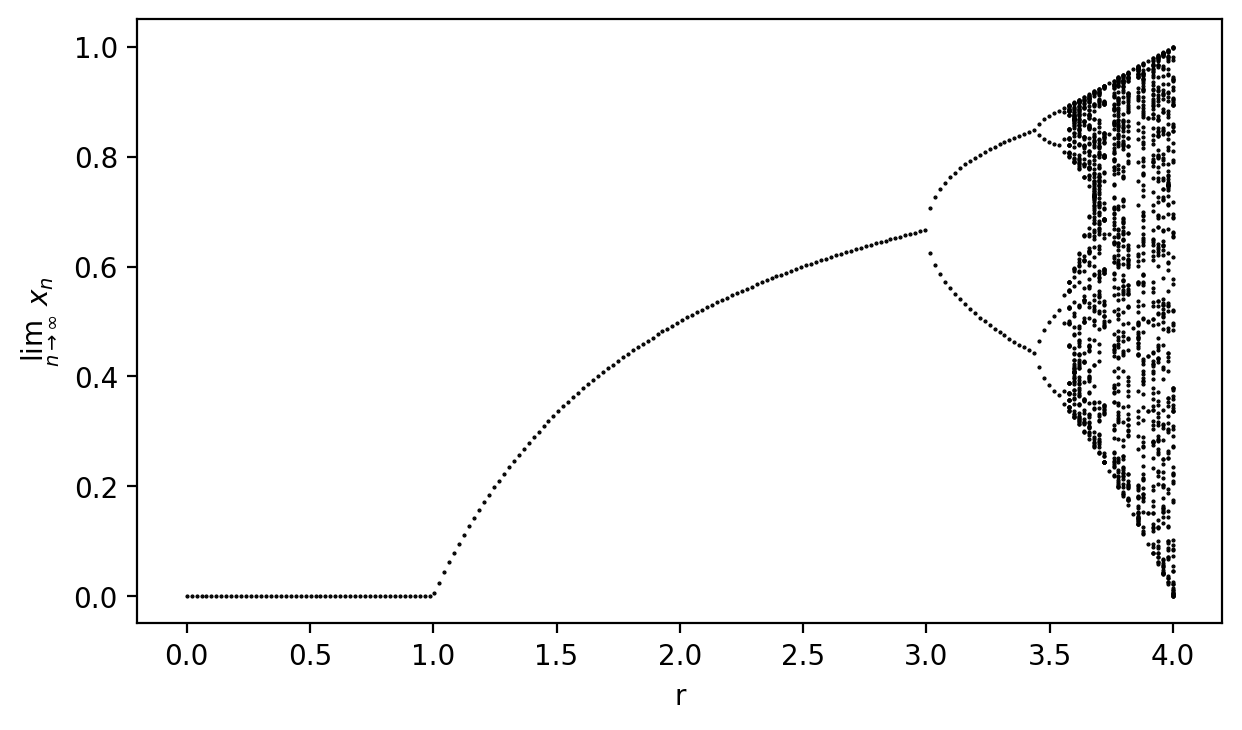

In [90]:
plt.figure(figsize=(7, 4), dpi=200)
for i in range(len(r)):
    for lim in series_limits[i]:
        plt.plot(r[i], lim, '.', c='k', markersize=1)
plt.ylim(-0.05, 1.05)
plt.xlabel('r')
plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
plt.show()

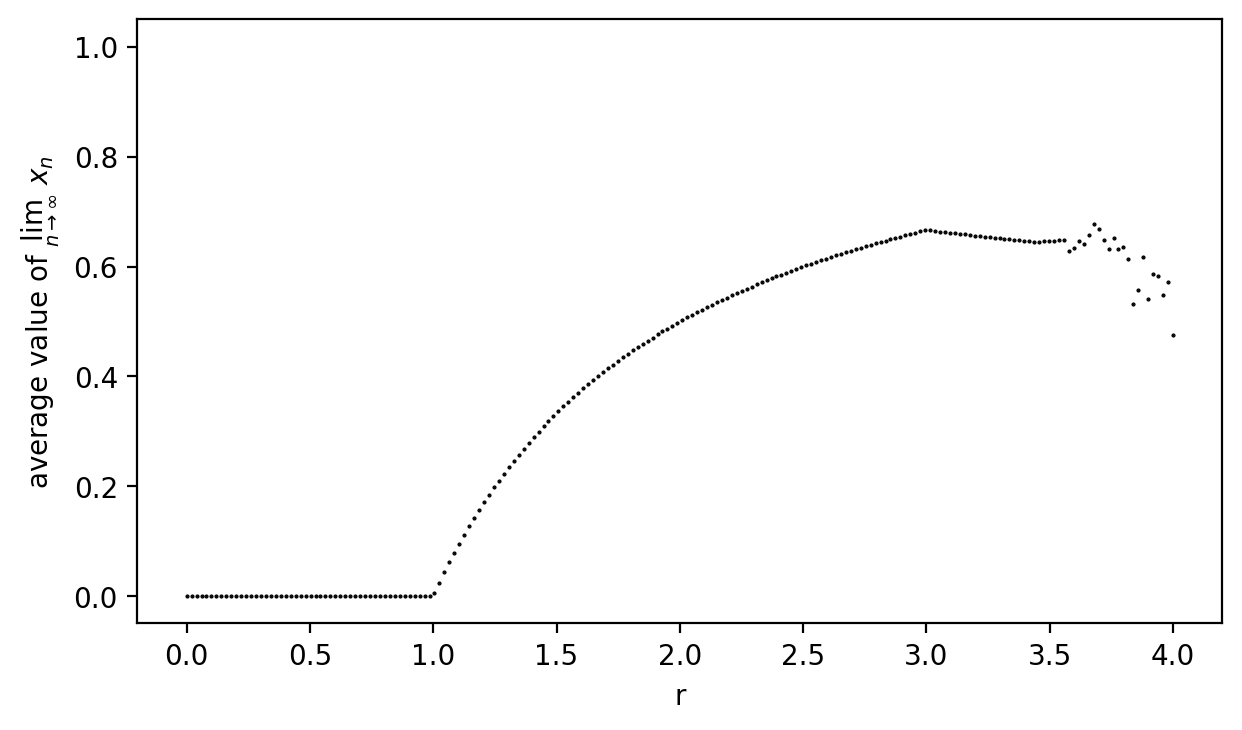

In [91]:
plt.figure(figsize=(7, 4), dpi=200)
for i in range(len(r)):
    plt.plot(r[i], np.average(series_limits[i]), '.', c='k', markersize=1)
plt.ylim(-0.05, 1.05)
plt.xlabel('r')
plt.ylabel('average value of $\lim_{n \\rightarrow \infty}~x_n$')
plt.show()

In [97]:
np.average(logistic_map_lim(3.1, N = 500000))

0.6613

In [ ]:
series_limits.append(logistic_map_lim(R))

In [27]:
def logistic_map_lim_average(r, N = 500000):
    lim_average = []
    for R in r:
        lim_average.append(np.average(logistic_map_lim(R, N)))
    return np.array(lim_average)

In [114]:
r = np.linspace(0, 4, 1201)
rs = np.split(r[1:], 4)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 4)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_average, rs)

# close threads
pool.close()

In [115]:
# processing results
lim_average = np.array([0])
lim_average = np.append(lim_average, np.concatenate(results))

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 85.655s.


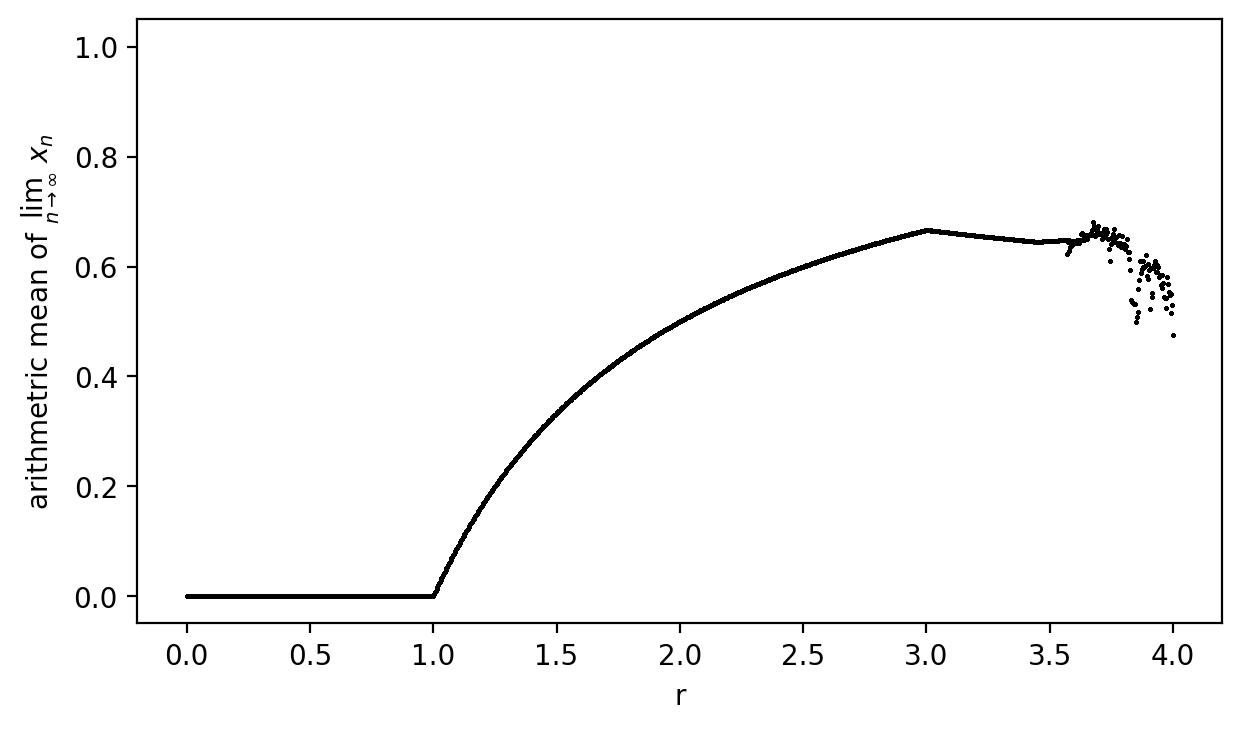

In [172]:
plt.figure(figsize=(7, 4), dpi=200)
for i in range(len(r)):
    plt.plot(r, lim_average, '.', c='k', markersize=0.5)
plt.ylim(-0.05, 1.05)
plt.xlabel('r')
plt.ylabel('arithmetric mean of $\lim_{n \\rightarrow \infty}~x_n$')
plt.show()

In [176]:
r = np.linspace(3.5, 4, 600)
rs = np.split(r[0:], 6)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 6)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_average, rs)

# close threads
pool.close()

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 32.326s.


In [177]:
# processing results
lim_average_detail = np.array([])
lim_average_detail = np.append(lim_average_detail, np.concatenate(results))

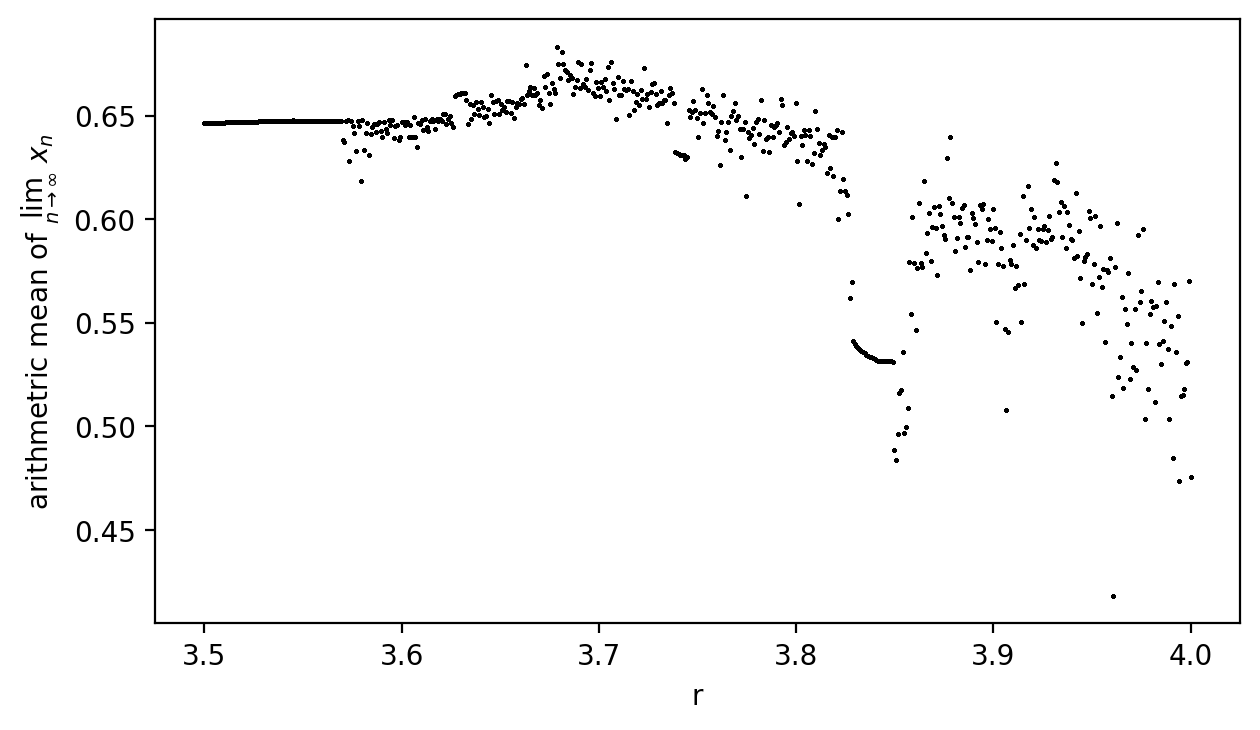

In [180]:
plt.figure(figsize=(7, 4), dpi=200)
for i in range(len(r)):
    plt.plot(r, lim_average_detail, '.', c='k', markersize=0.5)
#plt.ylim(-0.05, 1.05)
plt.xlabel('r')
plt.ylabel('arithmetric mean of $\lim_{n \\rightarrow \infty}~x_n$')
plt.show()

In [137]:
from scipy.stats.mstats import gmean

In [162]:
def logistic_map_lim_gmean(r, N = 500000):
    lim_gmean = []
    for R in r:
        lim_gmean.append(gmean(logistic_map_lim(R, N)))
    return np.array(lim_gmean)

In [168]:
r = np.linspace(0, 4, 1201)
rs = np.split(r[1:], 4)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 4)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_gmean, rs)

# close threads
pool.close()

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 83.367s.


In [169]:
# processing results
lim_gmean = np.array([0])
lim_gmean = np.append(lim_gmean, np.concatenate(results))

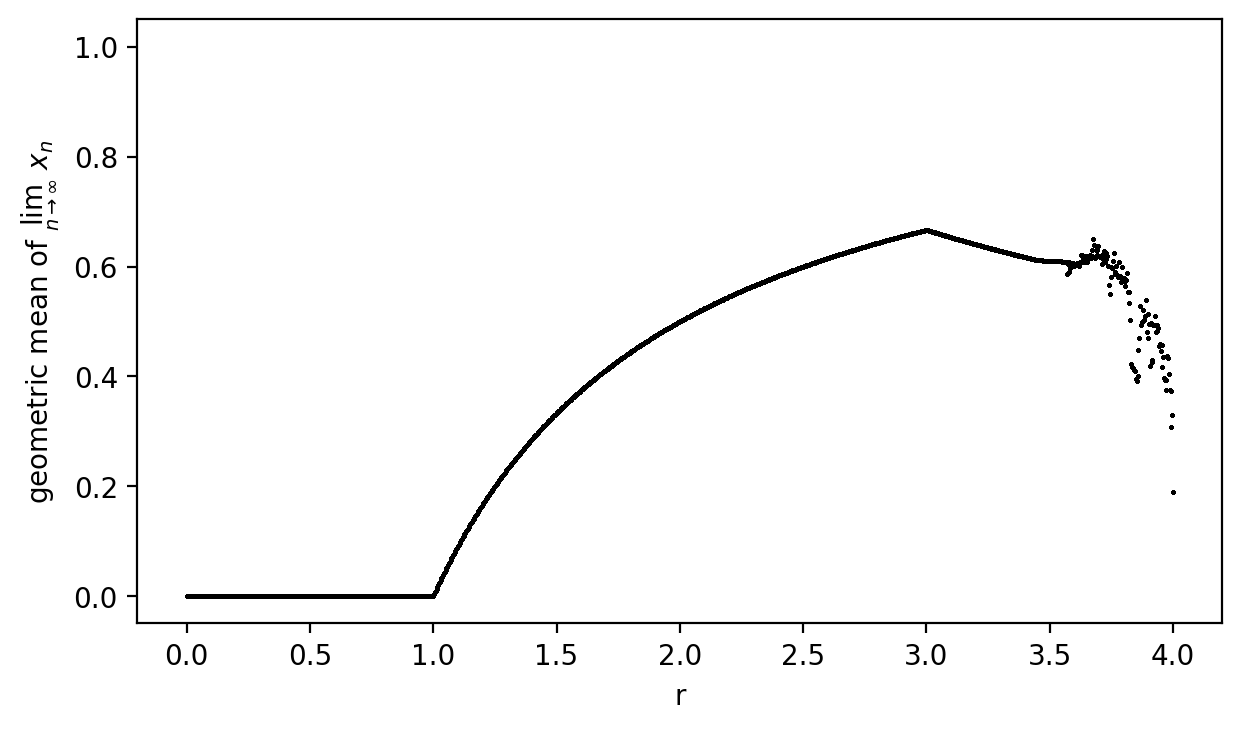

In [170]:
plt.figure(figsize=(7, 4), dpi=200)
for i in range(len(r)):
    plt.plot(r, lim_gmean, '.', c='k', markersize=0.5)
plt.ylim(-0.05, 1.05)
plt.xlabel('r')
plt.ylabel('geometric mean of $\lim_{n \\rightarrow \infty}~x_n$')
plt.show()

In [222]:
def chen_map_lim(T, T_c, alpha = 1.5, N = 500000):
    x_series = []
    x_series.append(0.01)
    
    alpha = 0.75 * (1 - np.tanh(10 * (T - T_c)))

    for i in range(N):
        new_ele = alpha * x_series[-1] * np.exp(-T * np.tan(x_series[-1] * np.pi / 2))
        x_series.append(new_ele)

    x_series_lim_4 = np.around(x_series[-100:], 4)
    return np.unique(x_series_lim_4)

In [216]:
chen_map_lim(0.5, 2, N = 500000)

array([0.0557, 0.0564, 0.0567, 0.0628, 0.0985, 0.0995, 0.1163, 0.1459,
       0.1464, 0.1534, 0.1598, 0.1617, 0.1626, 0.1792, 0.2054, 0.222 ,
       0.2449, 0.2492, 0.2608, 0.2645, 0.2701, 0.2726, 0.2732, 0.2756,
       0.2759, 0.2802, 0.29  , 0.2993, 0.3181, 0.3406, 0.3515, 0.3822,
       0.3895, 0.3906, 0.407 , 0.4217, 0.4242, 0.4261, 0.4282, 0.4292,
       0.4399, 0.4624, 0.4651, 0.4653, 0.5213, 0.5374, 0.5553, 0.5995,
       0.6001, 0.6082, 0.6296, 0.6365, 0.6456, 0.6466, 0.6509, 0.652 ,
       0.6563, 0.6567, 0.6642, 0.6715, 0.681 , 0.6964, 0.7181, 0.7263,
       0.7323, 0.7505, 0.7597, 0.775 , 0.7937, 0.8142, 0.8201, 0.8228,
       0.824 , 0.8345, 0.8419, 0.8445, 0.8544, 0.8548, 0.8566, 0.8589,
       0.86  , 0.8607, 0.8613, 0.8626, 0.8635, 0.8662, 0.8673, 0.8727,
       0.8767, 0.8832, 0.8897, 0.8915, 0.8916, 0.8996, 0.9044, 0.9047,
       0.9163, 0.9185, 0.9186])

In [223]:
r = np.linspace(0.5, 2.2, 20)

series_limits = []

for R in r:
    series_limits.append(chen_map_lim(R, 2))

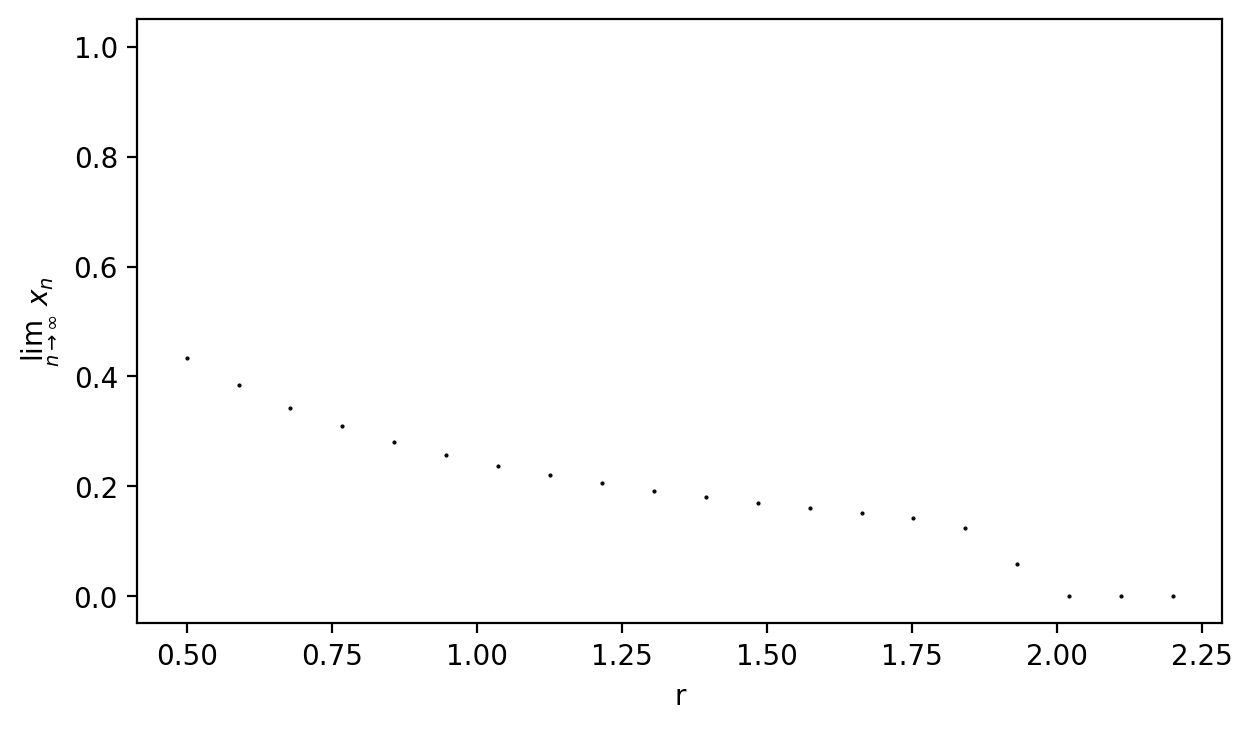

In [224]:
plt.figure(figsize=(7, 4), dpi=200)
for i in range(len(r)):
    for lim in series_limits[i]:
        plt.plot(r[i], lim, '.', c='k', markersize=1)
plt.ylim(-0.05, 1.05)
plt.xlabel('r')
plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
plt.show()

# For proposal

In [43]:
r = np.linspace(0, 4, 601)
rs = np.split(r[1:], 6)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 6)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_points_child, rs)

# close threads
pool.close()

# processing results
lim_points = np.array([[0], [0]])
for result in results:
    lim_points = np.concatenate((lim_points, result), axis=1)

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 43.905s.


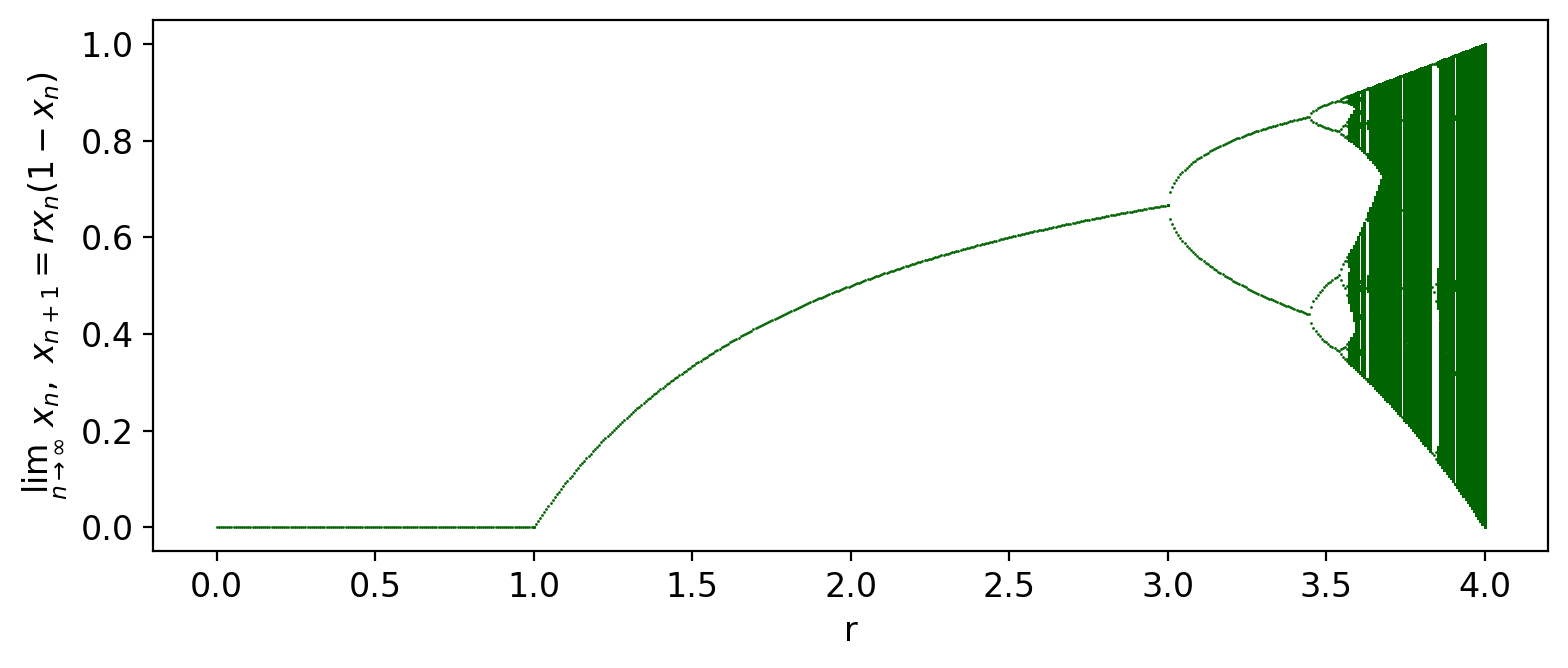

In [94]:
plt.figure(figsize=(8, 3.5), dpi=200)
plt.rcParams.update({'font.size': 12})
#plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 5, marker = '.', alpha = 1, linewidths = 0)
plt.scatter(lim_points[0], lim_points[1], c='darkgreen', s = 4, marker = '.', alpha = 1, linewidths = 0)
plt.xlim(-0.2, 4.2)
plt.ylim(-0.05, 1.05)
plt.xlabel('r')
plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n,~x_{n+1} = r x_n (1 - x_n)$')
#plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
plt.tight_layout()
#plt.savefig('./proposal_logistic_map.eps', dpi = 200, format = 'eps')
plt.savefig('./proposal_logistic_map.png', dpi = 300, format = 'png')
plt.show()

In [28]:
r = np.linspace(0, 4, 1201)
rs = np.split(r[1:], 4)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 4)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_average, rs)

# close threads
pool.close()

# processing results
lim_average = np.array([0])
lim_average = np.append(lim_average, np.concatenate(results))

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 86.900s.


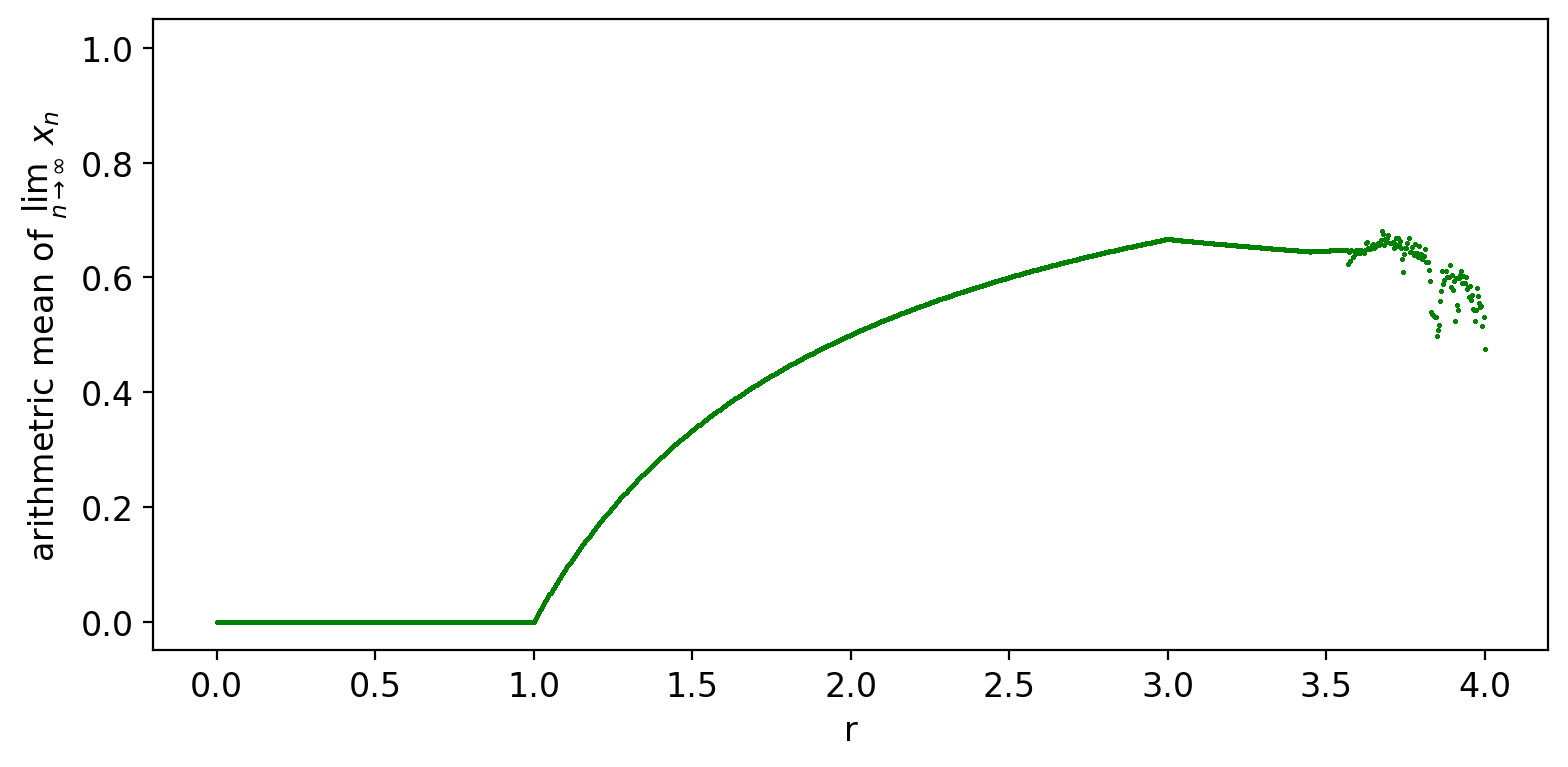

In [91]:
r = np.linspace(0, 4, 1201)

plt.figure(figsize=(8, 4), dpi=200)
plt.rcParams.update({'font.size': 12})
for i in range(len(r)):
    #plt.plot(r, lim_average, '.', c='#311B92', markersize=0.5)
    plt.plot(r, lim_average, '.', c='green', markersize=0.4)
plt.xlim(-0.2, 4.2)
plt.ylim(-0.05, 1.05)
plt.xlabel('r')
plt.ylabel('arithmetic mean of $\lim_{n \\rightarrow \infty}~x_n$')
plt.tight_layout()
plt.savefig('./proposal_logistic_map_average.eps', dpi = 200, format = 'eps')
plt.show()

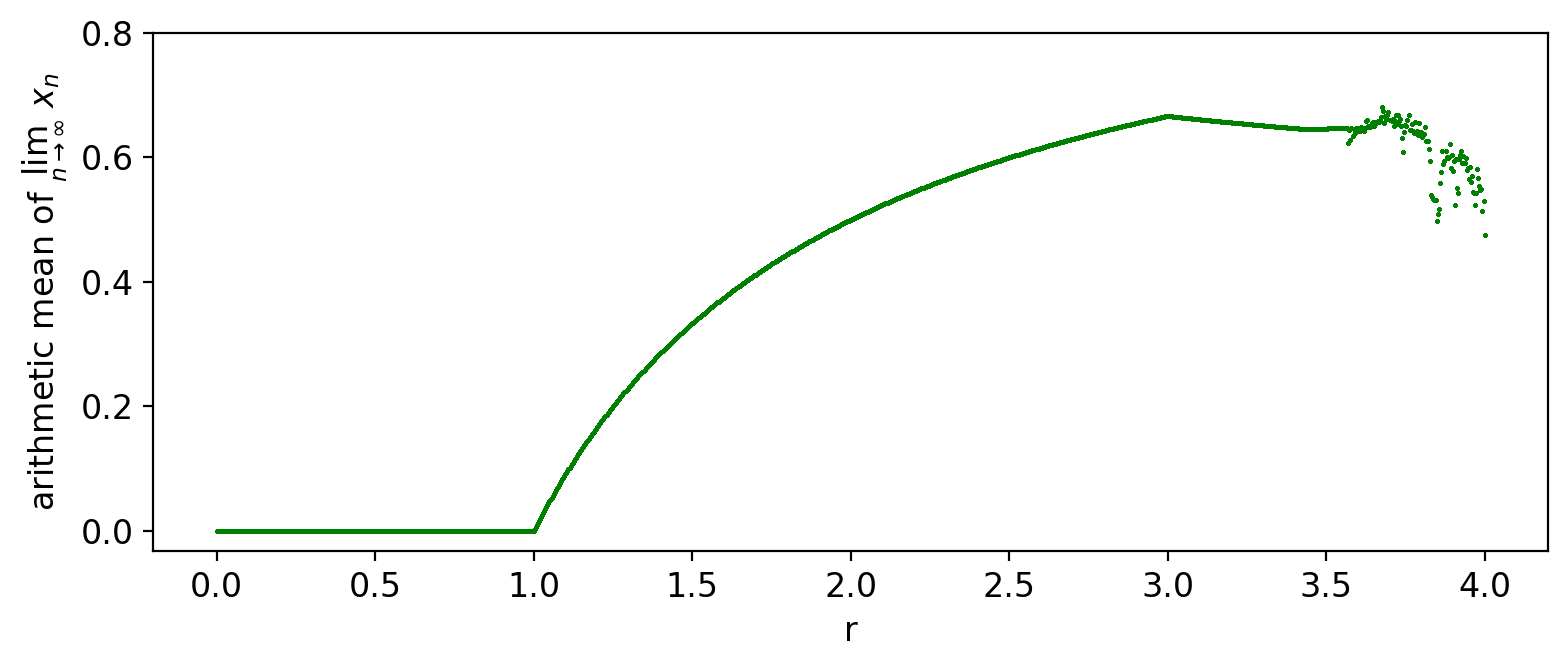

In [95]:
r = np.linspace(0, 4, 1201)

plt.figure(figsize=(8, 3.5), dpi=200)
plt.rcParams.update({'font.size': 12})
for i in range(len(r)):
    #plt.plot(r, lim_average, '.', c='#311B92', markersize=0.5)
    plt.plot(r, lim_average, '.', c='green', markersize=0.4)
plt.xlim(-0.2, 4.2)
plt.ylim(-0.033, 0.8)
plt.xlabel('r')
plt.ylabel('arithmetic mean of $\lim_{n \\rightarrow \infty}~x_n$')
plt.tight_layout()
#plt.savefig('./proposal_logistic_map_mean.eps', dpi = 200, format = 'eps')
plt.savefig('./proposal_logistic_map_mean.png', dpi = 300, format = 'png')
plt.show()

In [82]:
0.6667 * 1.2

0.80004

In [59]:
(x, y) = (np.array([21.226, 21.236, 21.246, 21.253, 21.258, 21.264, 21.331, 21.336,
        21.352, 21.386, 21.437, 21.471, 21.515, 21.593, 21.636, 21.72 ,
        21.832, 21.847, 21.927, 21.942, 22.045, 22.157, 22.252, 22.388,
        22.473, 22.578, 22.66 , 22.781, 22.816, 22.857, 23.034, 23.051,
        23.237, 23.353, 23.448, 23.535, 23.649, 23.757, 23.84 , 23.935,
        24.035, 24.126, 24.195, 24.328, 24.398, 24.512, 24.6  , 24.679,
        24.8  , 24.885, 25.002, 25.089, 25.212, 25.25 , 25.38 , 25.501,
        25.573, 25.707, 25.846, 25.948, 26.043, 26.111, 26.244, 26.321,
        26.444, 26.521, 26.636, 26.714, 26.837, 26.943, 27.019, 27.086,
        27.22 , 27.299, 27.419, 27.5  , 27.624, 27.704, 27.78 , 27.91 ,
        27.984, 28.113, 28.217, 28.324, 28.382, 28.514, 28.592, 28.667,
        28.8  , 28.876, 29.021, 29.084, 29.2  , 29.288, 29.407, 29.498,
        29.575, 29.726, 29.809, 29.894, 30.033, 30.061, 30.201, 30.282,
        30.437, 30.468, 30.605, 30.69 , 30.769, 30.896, 30.979, 31.101,
        31.235, 31.278, 31.411, 31.471, 31.626, 31.69 , 31.821, 31.872,
        32.004, 32.085, 32.24 , 32.28 , 32.395, 32.524, 32.566, 32.695,
        32.782, 32.9  , 32.988, 33.067, 33.193, 33.281, 33.397, 33.483,
        33.64 , 33.683, 33.791, 33.876, 33.994, 34.083, 34.225, 34.267,
        34.421, 34.48 , 34.642, 34.702, 34.784, 34.882, 35.   ]),
 np.array([0.49307136, 0.49783042, 0.50399887, 0.50682212, 0.51067724,
        0.50840062, 0.51375251, 0.5143522 , 0.5163541 , 0.51323273,
        0.51523608, 0.5096169 , 0.50673706, 0.50609394, 0.51063054,
        0.50866376, 0.50371464, 0.50918647, 0.50688723, 0.5023756 ,
        0.50654056, 0.50357402, 0.50519472, 0.50924263, 0.50843511,
        0.50830843, 0.50538872, 0.5117054 , 0.51556991, 0.51344366,
        0.51670648, 0.51732547, 0.51592468, 0.51956313, 0.52036165,
        0.52204149, 0.5206235 , 0.5244732 , 0.52061359, 0.5207751 ,
        0.52336326, 0.52317129, 0.52053667, 0.52015628, 0.51766789,
        0.51705635, 0.51321987, 0.51257619, 0.50757148, 0.50679586,
        0.50597849, 0.5044304 , 0.49884413, 0.50192611, 0.49304396,
        0.49215385, 0.48823475, 0.48288923, 0.48078329, 0.47407577,
        0.47265304, 0.46809249, 0.46292707, 0.45841756, 0.45464589,
        0.44959666, 0.44497963, 0.43992725, 0.43449158, 0.42987528,
        0.42470407, 0.41783846, 0.4134364 , 0.40721471, 0.40062369,
        0.39311276, 0.38853838, 0.38087502, 0.37379484, 0.36574448,
        0.35900896, 0.34987305, 0.34111915, 0.33316867, 0.32361815,
        0.3142898 , 0.30413758, 0.29154317, 0.28303914, 0.27108233,
        0.25976477, 0.24934356, 0.23368463, 0.22111764, 0.20495794,
        0.19087492, 0.17376256, 0.15648708, 0.14107063, 0.10584801,
        0.06178136, 0.03622324, 0.03078919, 0.02919436, 0.02905523,
        0.02901431, 0.02843263, 0.02847219, 0.02837847, 0.02839648,
        0.02805566, 0.02823703, 0.02825692, 0.02843048, 0.02825482,
        0.02831419, 0.02818203, 0.02825152, 0.02847176, 0.02818242,
        0.02838809, 0.0283575 , 0.02822174, 0.02839978, 0.02823411,
        0.02842699, 0.02841004, 0.0285644 , 0.02839394, 0.02844177,
        0.02811576, 0.02852433, 0.02845838, 0.02831866, 0.0283427 ,
        0.02852796, 0.02829579, 0.02824712, 0.02870506, 0.02870134,
        0.02831696, 0.02848589, 0.02864657, 0.02880527, 0.02860575,
        0.02856221, 0.02839882, 0.02851201, 0.02838617, 0.02836326,
        0.02829836]))

In [99]:
index = np.where(y == np.max(y))[0][0]
x[index]

23.757

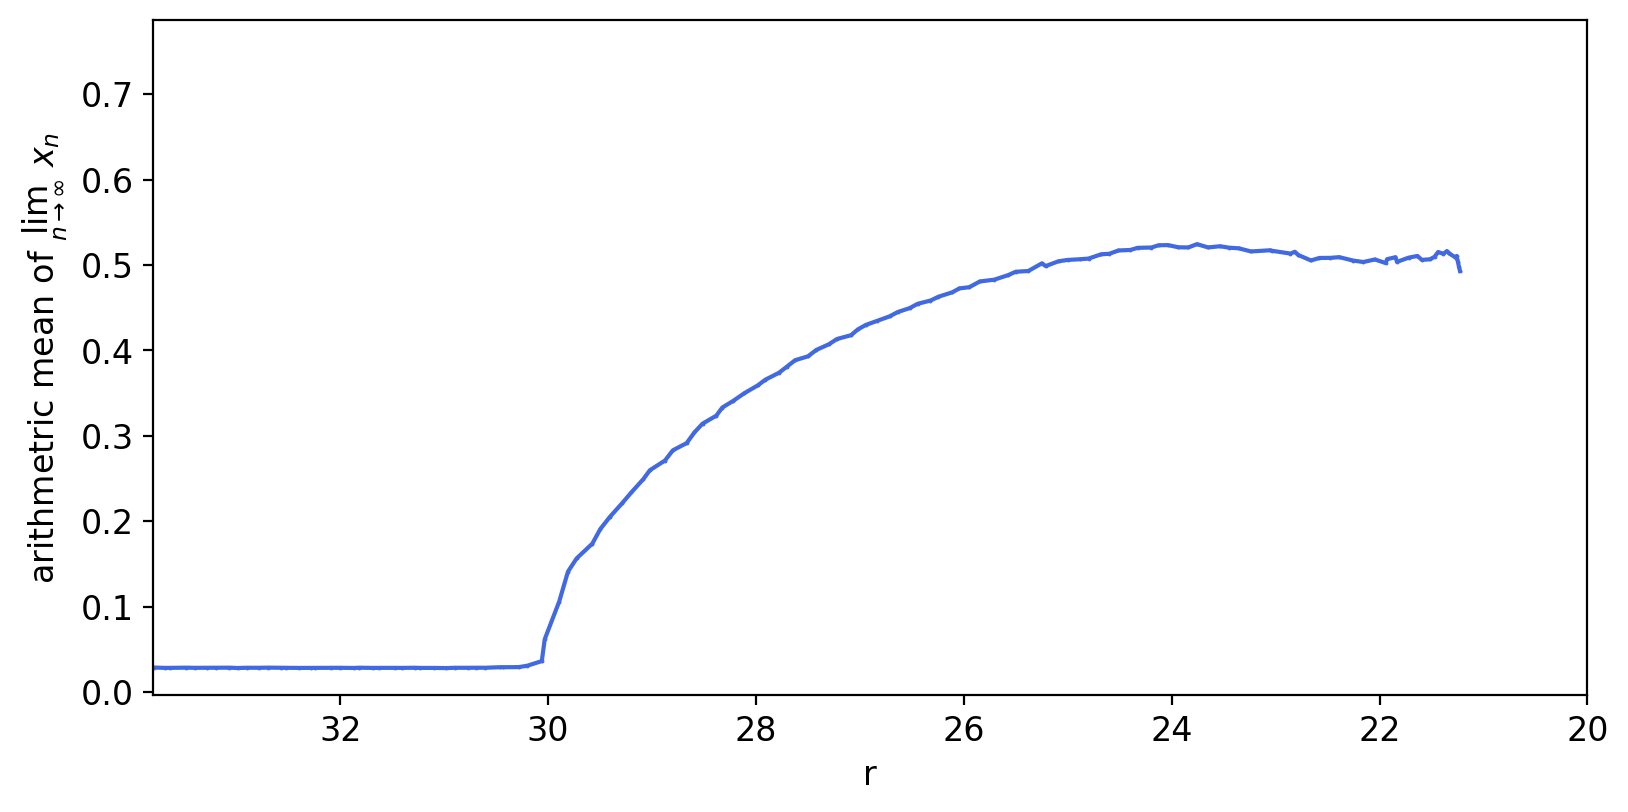

In [65]:
plt.figure(figsize=(8, 4), dpi=200)
plt.rcParams.update({'font.size': 12})
plt.plot(x, y, 'o-', c='royalblue', markersize=0.4)
plt.xlim(33.8, 20)
plt.ylim(-0.004, 0.7871)
plt.tight_layout()
plt.xlabel('r')
plt.ylabel('arithmetric mean of $\lim_{n \\rightarrow \infty}~x_n$')
plt.show()

In [ ]:
s